In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [2]:
def make_psd_self(data_in,fsamp,res):
    data_det=signal.detrend(data_in)
    res = res
    fsamp = fsamp # stays hard coded for now
    freqs=np.linspace(0,int(fsamp/2),(int(res/2))+1)    # change
    xFFT=np.fft.rfft(data_det)
    norm = np.sqrt(2 / (res* fsamp))
    xpsd = norm**2 * (xFFT * xFFT.conj()).real
    xphase=np.angle(xFFT)
    return freqs,xpsd,xphase

def psds_from_sum_over_BDFs(folder,filePreFix,noFiles,excludeList=[],fsamp=5000,res=50000,factor=10,includeSpin=True):
    folder=folder

    data_x =  data_z = data_s =0
    data_x_sum = data_z_sum = data_s_sum = 0

    for i in tqdm(range(noFiles)):
        file = folder +  "%s_%d.h5" %(filePreFix,i)
        BDF=BeadDataFile.BeadDataFile(file)
        data_x=BDF.x2
        data_z=BDF.z2
        if(includeSpin==True):data_s=BDF.spin_data[0]
        if(i not in excludeList):
            data_x_sum+=data_x
            data_z_sum+=data_z
            if(includeSpin==True):data_s_sum+=data_s

    
        else:print("File was %d was excluded" %i)
        
    fsamp=fsamp
    res=res
    fs=s=sp=0
    f ,x,xp = make_psd_self(data_in=data_x_sum,fsamp=fsamp,res=res)  
    f ,z,zp = make_psd_self(data_in=data_z_sum,fsamp=fsamp,res=res)  
    if(includeSpin==True):fs ,s,sp = make_psd_self(data_in=data_s_sum,fsamp=fsamp*factor,res=res*factor)  
    
    return f,fs,x,z,s,xp,zp,sp

In [ ]:
stdTest=[]

for i in tqdm(range(5000)):
    folder="/data/new_trap/20210423/Bead3/Shaking/NoAttractorShaking5/"
    BDF_b=BeadDataFile.BeadDataFile(folder+"/NoAttractorShaking6_%d.h5" %i)
    stdTest.append(np.std(BDF_b.x2))
    #plt.plot(BDF_b.x2)
    #plt.ylabel("x2 [a.u]")
    #plt.xlabel("time [samples]")


  0%|          | 24/5000 [00:01<04:37, 17.96it/s]

2213


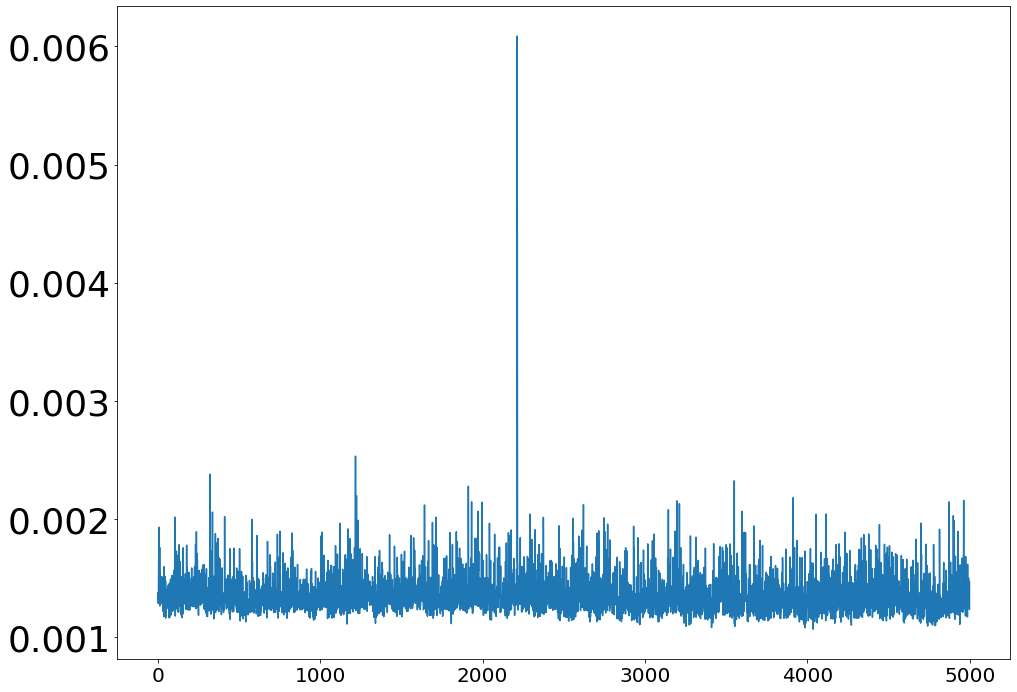

In [130]:
plt.plot(stdTest)
for element in stdTest:
    if(element > (np.mean(stdTest)*3)):
        print(stdTest.index(element))

In [3]:
folder="/data/new_trap/20210503/Bead2/Shaking/NoAttractorShaking0/"
filePreFix="/NoAttractorNoShaking0"
excludeList=[141,620,624,683,684,709,723,745,754,768,771,2213,3778]
noFiles=10
f,fs,xb,zb,sb,xbp,zbp,sbp= psds_from_sum_over_BDFs(folder,filePreFix,noFiles,excludeList=excludeList)



100%|██████████| 10/10 [00:00<00:00, 86.54it/s]


In [4]:
#folder="/data/new_trap/20200320/Bead1/Shaking/Shaking378/"
#filePreFix="Shaking3"
folder="/data/new_trap/20210503/Bead2/Shaking/NoAttractorShaking0/"
filePreFix="/NoAttractorShaking0"
#excludeList=[683,684,709,723,745,754,768,771]
noFiles=5000
f,fs,xs,zs,ss,xsp,zsp,ssp= psds_from_sum_over_BDFs(folder,filePreFix,noFiles,excludeList=excludeList,includeSpin=True)

  3%|▎         | 144/5000 [00:09<05:25, 14.93it/s]

File was 141 was excluded


 12%|█▏        | 624/5000 [00:39<04:02, 18.02it/s]

File was 620 was excluded


 13%|█▎        | 629/5000 [00:39<04:06, 17.72it/s]

File was 624 was excluded


 14%|█▍        | 688/5000 [00:42<03:30, 20.50it/s]

File was 683 was excluded
File was 684 was excluded


 14%|█▍        | 713/5000 [00:43<04:08, 17.24it/s]

File was 709 was excluded


 15%|█▍        | 726/5000 [00:44<04:03, 17.53it/s]

File was 723 was excluded


 15%|█▍        | 749/5000 [00:45<04:14, 16.69it/s]

File was 745 was excluded


 15%|█▌        | 758/5000 [00:46<04:19, 16.37it/s]

File was 754 was excluded


 15%|█▌        | 772/5000 [00:47<04:55, 14.30it/s]

File was 768 was excluded
File was 771 was excluded


 44%|████▍     | 2216/5000 [02:09<03:00, 15.45it/s]

File was 2213 was excluded


 76%|███████▌  | 3782/5000 [03:40<01:11, 17.01it/s]

File was 3778 was excluded


100%|██████████| 5000/5000 [04:49<00:00, 17.41it/s]


In [7]:
#folder="/data/new_trap/20210503/Bead2/Shaking/NoAttractorShaking0/"
#filePreFix="/NoAttractorShaking1"
folder="/data/new_trap/20200320/Bead1/Shaking/Shaking378/"
filePreFix="Shaking3"
#folder="/data/new_trap/20210423/Bead3/Shaking/NoAttractorShaking5/"
#filePreFix="/NoAttractorShaking6" 
#noFiles=500
f,fs,xs2,zs2,ss2,xsp2,zsp2,ssp2= psds_from_sum_over_BDFs(folder,filePreFix,noFiles,excludeList=excludeList,includeSpin=False)

  0%|          | 4/5000 [00:00<06:08, 13.57it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  0%|          | 6/5000 [00:00<06:05, 13.65it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  0%|          | 10/5000 [00:00<06:20, 13.10it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  0%|          | 12/5000 [00:00<06:26, 12.89it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  0%|          | 16/5000 [00:01<06:40, 12.45it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  0%|          | 20/5000 [00:01<05:50, 14.22it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  0%|          | 24/5000 [00:01<05:41, 14.56it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  1%|          | 26/5000 [00:01<06:19, 13.11it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  1%|          | 30/5000 [00:02<05:58, 13.85it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  1%|          | 34/5000 [00:02<05:30, 15.01it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  1%|          | 36/5000 [00:02<06:06, 13.54it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  1%|          | 40/5000 [00:02<05:52, 14.06it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  1%|          | 44/5000 [00:03<05:19, 15.52it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  1%|          | 48/5000 [00:03<05:17, 15.60it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  1%|          | 53/5000 [00:03<04:50, 17.02it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  1%|          | 57/5000 [00:03<04:47, 17.19it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  1%|          | 61/5000 [00:04<04:39, 17.65it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  1%|▏         | 65/5000 [00:04<04:49, 17.04it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  1%|▏         | 69/5000 [00:04<04:42, 17.44it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  1%|▏         | 73/5000 [00:04<04:53, 16.76it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  2%|▏         | 78/5000 [00:05<04:48, 17.06it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  2%|▏         | 82/5000 [00:05<04:52, 16.80it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  2%|▏         | 85/5000 [00:05<04:38, 17.66it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  2%|▏         | 89/5000 [00:05<04:47, 17.07it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  2%|▏         | 93/5000 [00:06<05:02, 16.22it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  2%|▏         | 96/5000 [00:06<04:45, 17.20it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  2%|▏         | 100/5000 [00:06<05:28, 14.91it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  2%|▏         | 104/5000 [00:06<05:20, 15.25it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  2%|▏         | 108/5000 [00:07<05:03, 16.10it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  2%|▏         | 112/5000 [00:07<05:21, 15.20it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  2%|▏         | 116/5000 [00:07<04:55, 16.54it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  2%|▏         | 120/5000 [00:07<04:43, 17.20it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  2%|▎         | 125/5000 [00:08<04:35, 17.69it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  3%|▎         | 129/5000 [00:08<04:29, 18.05it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  3%|▎         | 134/5000 [00:08<04:23, 18.45it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  3%|▎         | 136/5000 [00:08<04:23, 18.45it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  3%|▎         | 141/5000 [00:08<04:14, 19.10it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
File was 141 was excluded


  3%|▎         | 145/5000 [00:09<04:18, 18.75it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  3%|▎         | 150/5000 [00:09<04:13, 19.16it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  3%|▎         | 154/5000 [00:09<04:37, 17.45it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  3%|▎         | 158/5000 [00:09<04:39, 17.31it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  3%|▎         | 162/5000 [00:10<04:41, 17.17it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  3%|▎         | 166/5000 [00:10<04:50, 16.63it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  3%|▎         | 171/5000 [00:10<04:41, 17.17it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  3%|▎         | 174/5000 [00:10<04:44, 16.95it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  4%|▎         | 178/5000 [00:10<04:49, 16.63it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  4%|▎         | 183/5000 [00:11<04:30, 17.81it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  4%|▎         | 187/5000 [00:11<04:51, 16.49it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  4%|▍         | 189/5000 [00:11<04:55, 16.30it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  4%|▍         | 194/5000 [00:11<04:40, 17.12it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  4%|▍         | 198/5000 [00:12<04:30, 17.74it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  4%|▍         | 202/5000 [00:12<04:30, 17.75it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  4%|▍         | 206/5000 [00:12<04:54, 16.30it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  4%|▍         | 210/5000 [00:12<04:48, 16.59it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  4%|▍         | 214/5000 [00:13<04:37, 17.24it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  4%|▍         | 216/5000 [00:13<04:37, 17.24it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  4%|▍         | 221/5000 [00:13<04:33, 17.46it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  4%|▍         | 225/5000 [00:13<04:29, 17.75it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  5%|▍         | 229/5000 [00:13<04:41, 16.95it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  5%|▍         | 233/5000 [00:14<04:44, 16.75it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  5%|▍         | 237/5000 [00:14<04:57, 16.02it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  5%|▍         | 241/5000 [00:14<04:45, 16.69it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  5%|▍         | 245/5000 [00:14<04:40, 16.94it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  5%|▌         | 250/5000 [00:15<04:32, 17.46it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  5%|▌         | 254/5000 [00:15<04:33, 17.37it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  5%|▌         | 258/5000 [00:15<04:26, 17.80it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  5%|▌         | 262/5000 [00:15<04:48, 16.40it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  5%|▌         | 266/5000 [00:16<04:42, 16.75it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  5%|▌         | 268/5000 [00:16<04:52, 16.17it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  5%|▌         | 272/5000 [00:16<05:28, 14.38it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  6%|▌         | 276/5000 [00:16<04:48, 16.39it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  6%|▌         | 280/5000 [00:17<04:56, 15.90it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  6%|▌         | 283/5000 [00:17<04:35, 17.12it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  6%|▌         | 289/5000 [00:17<04:33, 17.24it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  6%|▌         | 293/5000 [00:17<04:44, 16.54it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  6%|▌         | 297/5000 [00:17<04:36, 17.02it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  6%|▌         | 300/5000 [00:18<04:27, 17.59it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  6%|▌         | 304/5000 [00:18<04:33, 17.17it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  6%|▌         | 308/5000 [00:18<04:51, 16.09it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  6%|▌         | 312/5000 [00:18<05:05, 15.37it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  6%|▋         | 314/5000 [00:19<05:05, 15.34it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  6%|▋         | 318/5000 [00:19<05:12, 14.99it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  6%|▋         | 322/5000 [00:19<04:53, 15.95it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  7%|▋         | 326/5000 [00:19<04:48, 16.18it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  7%|▋         | 330/5000 [00:20<04:42, 16.53it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  7%|▋         | 334/5000 [00:20<04:49, 16.09it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  7%|▋         | 338/5000 [00:20<04:56, 15.70it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  7%|▋         | 342/5000 [00:20<04:59, 15.57it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  7%|▋         | 344/5000 [00:20<05:08, 15.09it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  7%|▋         | 348/5000 [00:21<05:15, 14.73it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  7%|▋         | 352/5000 [00:21<04:54, 15.78it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  7%|▋         | 356/5000 [00:21<05:05, 15.18it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  7%|▋         | 360/5000 [00:22<05:09, 15.00it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  7%|▋         | 362/5000 [00:22<05:14, 14.74it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  7%|▋         | 368/5000 [00:22<04:48, 16.08it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  7%|▋         | 370/5000 [00:22<05:13, 14.75it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  7%|▋         | 374/5000 [00:22<05:14, 14.69it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  8%|▊         | 378/5000 [00:23<04:51, 15.85it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  8%|▊         | 382/5000 [00:23<04:54, 15.68it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  8%|▊         | 386/5000 [00:23<04:49, 15.96it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  8%|▊         | 390/5000 [00:23<04:43, 16.24it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  8%|▊         | 394/5000 [00:24<04:46, 16.07it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  8%|▊         | 398/5000 [00:24<04:35, 16.69it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  8%|▊         | 402/5000 [00:24<04:38, 16.49it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  8%|▊         | 406/5000 [00:24<04:45, 16.11it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  8%|▊         | 410/5000 [00:25<04:39, 16.45it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  8%|▊         | 414/5000 [00:25<04:45, 16.05it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  8%|▊         | 418/5000 [00:25<04:40, 16.33it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  8%|▊         | 420/5000 [00:25<04:35, 16.62it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  8%|▊         | 424/5000 [00:26<05:03, 15.07it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  9%|▊         | 428/5000 [00:26<04:51, 15.68it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  9%|▊         | 432/5000 [00:26<05:00, 15.22it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  9%|▊         | 434/5000 [00:26<04:39, 16.32it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  9%|▉         | 438/5000 [00:26<04:49, 15.77it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  9%|▉         | 442/5000 [00:27<04:36, 16.51it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  9%|▉         | 446/5000 [00:27<04:28, 16.94it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  9%|▉         | 450/5000 [00:27<05:27, 13.91it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  9%|▉         | 452/5000 [00:27<06:31, 11.61it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data


  9%|▉         | 456/5000 [00:28<05:34, 13.57it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  9%|▉         | 458/5000 [00:28<05:42, 13.26it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  9%|▉         | 463/5000 [00:28<04:51, 15.55it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  9%|▉         | 467/5000 [00:28<04:34, 16.54it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


  9%|▉         | 471/5000 [00:29<04:21, 17.29it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 10%|▉         | 475/5000 [00:29<04:14, 17.75it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 10%|▉         | 479/5000 [00:29<04:23, 17.18it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 10%|▉         | 483/5000 [00:29<04:26, 16.93it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 10%|▉         | 488/5000 [00:30<04:09, 18.12it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 10%|▉         | 493/5000 [00:30<03:56, 19.06it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 10%|▉         | 496/5000 [00:30<03:52, 19.38it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 10%|█         | 500/5000 [00:30<04:06, 18.25it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 10%|█         | 505/5000 [00:30<03:59, 18.74it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 10%|█         | 509/5000 [00:31<04:18, 17.40it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 10%|█         | 513/5000 [00:31<04:13, 17.71it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 10%|█         | 518/5000 [00:31<04:01, 18.55it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 10%|█         | 521/5000 [00:31<03:58, 18.81it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 10%|█         | 525/5000 [00:32<04:48, 15.51it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 11%|█         | 527/5000 [00:32<05:16, 14.12it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 11%|█         | 531/5000 [00:32<05:56, 12.53it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 11%|█         | 535/5000 [00:32<05:43, 13.01it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 11%|█         | 539/5000 [00:33<05:00, 14.84it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 11%|█         | 542/5000 [00:33<04:36, 16.10it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 11%|█         | 546/5000 [00:33<04:31, 16.40it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 11%|█         | 550/5000 [00:33<04:31, 16.38it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 11%|█         | 555/5000 [00:34<04:14, 17.49it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 11%|█         | 559/5000 [00:34<04:10, 17.76it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 11%|█         | 561/5000 [00:34<04:23, 16.85it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 11%|█▏        | 567/5000 [00:34<04:16, 17.27it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 11%|█▏        | 571/5000 [00:34<04:11, 17.59it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 12%|█▏        | 575/5000 [00:35<04:18, 17.09it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 12%|█▏        | 579/5000 [00:35<04:07, 17.88it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 12%|█▏        | 582/5000 [00:35<03:52, 19.02it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 12%|█▏        | 586/5000 [00:35<03:58, 18.53it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 12%|█▏        | 591/5000 [00:36<04:11, 17.53it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 12%|█▏        | 595/5000 [00:36<04:16, 17.18it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 12%|█▏        | 597/5000 [00:36<04:52, 15.07it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 12%|█▏        | 603/5000 [00:36<04:26, 16.49it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 12%|█▏        | 606/5000 [00:37<04:40, 15.64it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 12%|█▏        | 608/5000 [00:37<04:47, 15.30it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 12%|█▏        | 610/5000 [00:37<05:55, 12.34it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data


 12%|█▏        | 614/5000 [00:37<06:28, 11.30it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 12%|█▏        | 618/5000 [00:38<05:24, 13.49it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 12%|█▏        | 620/5000 [00:38<04:56, 14.79it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
File was 620 was excluded


 12%|█▎        | 625/5000 [00:38<04:37, 15.75it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
File was 624 was excluded
No seismometer data
No z_set data


 13%|█▎        | 628/5000 [00:38<04:20, 16.79it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 13%|█▎        | 634/5000 [00:38<03:54, 18.63it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 13%|█▎        | 639/5000 [00:39<03:45, 19.30it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 13%|█▎        | 644/5000 [00:39<03:39, 19.81it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 13%|█▎        | 647/5000 [00:39<03:37, 20.03it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 13%|█▎        | 653/5000 [00:39<03:33, 20.35it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 13%|█▎        | 656/5000 [00:39<03:29, 20.71it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 13%|█▎        | 662/5000 [00:40<03:34, 20.27it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 13%|█▎        | 668/5000 [00:40<03:27, 20.89it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 13%|█▎        | 671/5000 [00:40<03:29, 20.65it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 14%|█▎        | 677/5000 [00:40<03:27, 20.84it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 14%|█▎        | 683/5000 [00:41<03:30, 20.47it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 14%|█▎        | 686/5000 [00:41<03:46, 19.09it/s]

No seismometer data
No z_set data
File was 683 was excluded
No seismometer data
No z_set data
File was 684 was excluded
No seismometer data
No z_set data
No seismometer data
No z_set data


 14%|█▍        | 692/5000 [00:41<03:25, 20.94it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 14%|█▍        | 698/5000 [00:42<03:17, 21.75it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 14%|█▍        | 701/5000 [00:42<03:20, 21.39it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 14%|█▍        | 704/5000 [00:42<03:37, 19.76it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 14%|█▍        | 709/5000 [00:42<04:07, 17.37it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 14%|█▍        | 713/5000 [00:42<04:12, 16.96it/s]

No seismometer data
No z_set data
File was 709 was excluded
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 14%|█▍        | 717/5000 [00:43<04:17, 16.66it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 14%|█▍        | 722/5000 [00:43<03:57, 18.01it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 15%|█▍        | 727/5000 [00:43<03:47, 18.79it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
File was 723 was excluded
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 15%|█▍        | 729/5000 [00:43<03:46, 18.85it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 15%|█▍        | 736/5000 [00:44<03:41, 19.24it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 15%|█▍        | 741/5000 [00:44<03:38, 19.52it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 15%|█▍        | 746/5000 [00:44<03:30, 20.16it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
File was 745 was excluded


 15%|█▍        | 749/5000 [00:44<03:19, 21.27it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 15%|█▌        | 755/5000 [00:45<03:25, 20.62it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
File was 754 was excluded


 15%|█▌        | 758/5000 [00:45<03:27, 20.42it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 15%|█▌        | 761/5000 [00:45<03:29, 20.22it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 15%|█▌        | 767/5000 [00:45<03:27, 20.35it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
File was 768 was excluded


 15%|█▌        | 773/5000 [00:45<03:19, 21.18it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
File was 771 was excluded
No seismometer data
No z_set data
No seismometer data
No z_set data


 16%|█▌        | 776/5000 [00:46<03:21, 20.91it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 16%|█▌        | 782/5000 [00:46<03:24, 20.58it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 16%|█▌        | 788/5000 [00:46<03:14, 21.70it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 16%|█▌        | 794/5000 [00:46<03:14, 21.63it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 16%|█▌        | 797/5000 [00:47<03:12, 21.86it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 16%|█▌        | 803/5000 [00:47<03:21, 20.79it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 16%|█▌        | 806/5000 [00:47<03:16, 21.38it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 16%|█▌        | 809/5000 [00:47<03:17, 21.17it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 16%|█▋        | 815/5000 [00:47<03:39, 19.04it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 16%|█▋        | 821/5000 [00:48<03:27, 20.11it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 16%|█▋        | 824/5000 [00:48<03:58, 17.50it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 17%|█▋        | 830/5000 [00:48<03:32, 19.67it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 17%|█▋        | 833/5000 [00:48<03:30, 19.81it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 17%|█▋        | 839/5000 [00:49<03:23, 20.42it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 17%|█▋        | 845/5000 [00:49<03:19, 20.86it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 17%|█▋        | 848/5000 [00:49<03:18, 20.91it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 17%|█▋        | 854/5000 [00:49<03:20, 20.63it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 17%|█▋        | 857/5000 [00:50<03:17, 21.01it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 17%|█▋        | 863/5000 [00:50<03:20, 20.67it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 17%|█▋        | 866/5000 [00:50<03:23, 20.29it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 17%|█▋        | 872/5000 [00:50<03:07, 22.00it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 18%|█▊        | 875/5000 [00:50<03:07, 22.05it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 18%|█▊        | 881/5000 [00:51<03:18, 20.77it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 18%|█▊        | 884/5000 [00:51<03:18, 20.78it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 18%|█▊        | 887/5000 [00:51<03:27, 19.84it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 18%|█▊        | 893/5000 [00:51<03:23, 20.16it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 18%|█▊        | 899/5000 [00:52<03:11, 21.37it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 18%|█▊        | 902/5000 [00:52<03:14, 21.11it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 18%|█▊        | 908/5000 [00:52<03:16, 20.81it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 18%|█▊        | 911/5000 [00:52<03:26, 19.83it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 18%|█▊        | 915/5000 [00:52<04:05, 16.62it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 18%|█▊        | 919/5000 [00:53<03:56, 17.27it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 18%|█▊        | 923/5000 [00:53<03:54, 17.38it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 18%|█▊        | 925/5000 [00:53<04:28, 15.17it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 19%|█▊        | 930/5000 [00:53<04:02, 16.75it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 19%|█▊        | 934/5000 [00:54<03:47, 17.88it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 19%|█▉        | 939/5000 [00:54<03:36, 18.80it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 19%|█▉        | 945/5000 [00:54<03:19, 20.30it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 19%|█▉        | 948/5000 [00:54<03:19, 20.36it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 19%|█▉        | 954/5000 [00:54<03:21, 20.05it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 19%|█▉        | 957/5000 [00:55<03:16, 20.52it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 19%|█▉        | 963/5000 [00:55<03:20, 20.09it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 19%|█▉        | 969/5000 [00:55<03:09, 21.23it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 19%|█▉        | 972/5000 [00:55<03:08, 21.33it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 20%|█▉        | 978/5000 [00:56<03:09, 21.26it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 20%|█▉        | 981/5000 [00:56<03:15, 20.51it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 20%|█▉        | 987/5000 [00:56<03:15, 20.56it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 20%|█▉        | 993/5000 [00:56<03:14, 20.64it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 20%|█▉        | 996/5000 [00:56<03:12, 20.85it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 20%|█▉        | 999/5000 [00:57<03:18, 20.12it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 20%|██        | 1005/5000 [00:57<03:22, 19.72it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 20%|██        | 1011/5000 [00:57<03:15, 20.39it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 20%|██        | 1014/5000 [00:57<03:30, 18.94it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 20%|██        | 1020/5000 [00:58<03:16, 20.29it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 20%|██        | 1023/5000 [00:58<03:11, 20.73it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 21%|██        | 1028/5000 [00:58<03:45, 17.59it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 21%|██        | 1031/5000 [00:58<03:34, 18.48it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 21%|██        | 1036/5000 [00:59<03:39, 18.10it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 21%|██        | 1041/5000 [00:59<03:39, 18.06it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 21%|██        | 1045/5000 [00:59<03:45, 17.50it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 21%|██        | 1049/5000 [00:59<03:44, 17.58it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 21%|██        | 1055/5000 [01:00<03:23, 19.38it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 21%|██        | 1060/5000 [01:00<03:16, 20.10it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 21%|██▏       | 1063/5000 [01:00<03:06, 21.13it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 21%|██▏       | 1069/5000 [01:00<03:10, 20.63it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 22%|██▏       | 1075/5000 [01:01<03:04, 21.30it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 22%|██▏       | 1078/5000 [01:01<03:00, 21.68it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 22%|██▏       | 1084/5000 [01:01<03:05, 21.17it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 22%|██▏       | 1087/5000 [01:01<03:19, 19.65it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 22%|██▏       | 1092/5000 [01:01<03:20, 19.47it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 22%|██▏       | 1098/5000 [01:02<03:05, 21.04it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 22%|██▏       | 1101/5000 [01:02<03:03, 21.19it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 22%|██▏       | 1107/5000 [01:02<03:10, 20.42it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 22%|██▏       | 1110/5000 [01:02<03:30, 18.45it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 22%|██▏       | 1114/5000 [01:03<03:55, 16.49it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 22%|██▏       | 1118/5000 [01:03<03:59, 16.20it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 22%|██▏       | 1122/5000 [01:03<04:01, 16.05it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 23%|██▎       | 1126/5000 [01:03<03:51, 16.71it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 23%|██▎       | 1129/5000 [01:03<03:40, 17.57it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 23%|██▎       | 1134/5000 [01:04<03:31, 18.31it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 23%|██▎       | 1140/5000 [01:04<03:09, 20.33it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 23%|██▎       | 1143/5000 [01:04<03:05, 20.75it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 23%|██▎       | 1149/5000 [01:04<02:56, 21.82it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 23%|██▎       | 1152/5000 [01:05<03:01, 21.21it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 23%|██▎       | 1158/5000 [01:05<03:11, 20.04it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 23%|██▎       | 1164/5000 [01:05<03:12, 19.88it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 23%|██▎       | 1168/5000 [01:05<03:16, 19.52it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 23%|██▎       | 1171/5000 [01:06<03:13, 19.83it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 24%|██▎       | 1177/5000 [01:06<03:17, 19.35it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 24%|██▎       | 1181/5000 [01:06<03:39, 17.41it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 24%|██▎       | 1184/5000 [01:06<03:26, 18.44it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 24%|██▍       | 1188/5000 [01:06<03:23, 18.77it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 24%|██▍       | 1194/5000 [01:07<03:14, 19.56it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 24%|██▍       | 1200/5000 [01:07<02:59, 21.14it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 24%|██▍       | 1203/5000 [01:07<03:10, 19.93it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 24%|██▍       | 1206/5000 [01:07<03:07, 20.28it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 24%|██▍       | 1212/5000 [01:08<03:16, 19.23it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 24%|██▍       | 1217/5000 [01:08<03:09, 20.01it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 24%|██▍       | 1223/5000 [01:08<03:19, 18.91it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 25%|██▍       | 1226/5000 [01:08<03:10, 19.83it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 25%|██▍       | 1232/5000 [01:09<03:02, 20.67it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 25%|██▍       | 1235/5000 [01:09<03:01, 20.71it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 25%|██▍       | 1241/5000 [01:09<03:07, 20.08it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 25%|██▍       | 1244/5000 [01:09<03:05, 20.20it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 25%|██▌       | 1250/5000 [01:10<03:03, 20.47it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 25%|██▌       | 1256/5000 [01:10<02:58, 21.01it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 25%|██▌       | 1259/5000 [01:10<03:04, 20.31it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 25%|██▌       | 1265/5000 [01:10<03:05, 20.17it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 25%|██▌       | 1268/5000 [01:10<03:06, 19.97it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 25%|██▌       | 1274/5000 [01:11<03:02, 20.37it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 26%|██▌       | 1277/5000 [01:11<03:04, 20.15it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 26%|██▌       | 1280/5000 [01:11<03:04, 20.20it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 26%|██▌       | 1285/5000 [01:11<03:09, 19.56it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 26%|██▌       | 1291/5000 [01:12<03:00, 20.50it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 26%|██▌       | 1297/5000 [01:12<02:52, 21.52it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 26%|██▌       | 1300/5000 [01:12<02:54, 21.25it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 26%|██▌       | 1306/5000 [01:12<03:02, 20.28it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 26%|██▌       | 1309/5000 [01:12<03:15, 18.86it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 26%|██▋       | 1315/5000 [01:13<03:06, 19.79it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 26%|██▋       | 1318/5000 [01:13<03:05, 19.80it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 26%|██▋       | 1324/5000 [01:13<02:57, 20.66it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 27%|██▋       | 1327/5000 [01:13<02:59, 20.47it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 27%|██▋       | 1333/5000 [01:14<03:00, 20.31it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 27%|██▋       | 1339/5000 [01:14<02:59, 20.38it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 27%|██▋       | 1342/5000 [01:14<02:55, 20.79it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 27%|██▋       | 1348/5000 [01:14<02:55, 20.83it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 27%|██▋       | 1354/5000 [01:15<02:52, 21.08it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 27%|██▋       | 1357/5000 [01:15<02:57, 20.55it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 27%|██▋       | 1363/5000 [01:15<02:52, 21.07it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 27%|██▋       | 1369/5000 [01:15<02:47, 21.65it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 27%|██▋       | 1372/5000 [01:15<02:49, 21.35it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 28%|██▊       | 1378/5000 [01:16<02:49, 21.32it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 28%|██▊       | 1381/5000 [01:16<03:02, 19.80it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 28%|██▊       | 1386/5000 [01:16<03:16, 18.43it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 28%|██▊       | 1388/5000 [01:16<03:12, 18.74it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 28%|██▊       | 1393/5000 [01:17<03:14, 18.55it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 28%|██▊       | 1398/5000 [01:17<03:08, 19.08it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 28%|██▊       | 1404/5000 [01:17<02:55, 20.45it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 28%|██▊       | 1407/5000 [01:17<02:51, 20.94it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 28%|██▊       | 1412/5000 [01:18<03:11, 18.72it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 28%|██▊       | 1415/5000 [01:18<03:02, 19.65it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 28%|██▊       | 1420/5000 [01:18<03:10, 18.81it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 28%|██▊       | 1424/5000 [01:18<03:55, 15.21it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 29%|██▊       | 1428/5000 [01:19<03:56, 15.13it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 29%|██▊       | 1430/5000 [01:19<03:57, 15.03it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 29%|██▊       | 1434/5000 [01:19<04:03, 14.64it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 29%|██▉       | 1438/5000 [01:19<03:49, 15.54it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 29%|██▉       | 1442/5000 [01:19<03:47, 15.61it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 29%|██▉       | 1446/5000 [01:20<03:42, 16.01it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 29%|██▉       | 1450/5000 [01:20<03:51, 15.34it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 29%|██▉       | 1452/5000 [01:20<03:58, 14.88it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 29%|██▉       | 1456/5000 [01:20<03:46, 15.64it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 29%|██▉       | 1460/5000 [01:21<03:42, 15.90it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 29%|██▉       | 1464/5000 [01:21<04:10, 14.10it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 29%|██▉       | 1466/5000 [01:21<04:08, 14.22it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 29%|██▉       | 1470/5000 [01:21<04:09, 14.18it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 29%|██▉       | 1472/5000 [01:21<04:05, 14.39it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 30%|██▉       | 1476/5000 [01:22<04:01, 14.61it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 30%|██▉       | 1480/5000 [01:22<03:49, 15.36it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 30%|██▉       | 1482/5000 [01:22<03:53, 15.08it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 30%|██▉       | 1486/5000 [01:22<03:51, 15.20it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 30%|██▉       | 1490/5000 [01:23<04:15, 13.76it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 30%|██▉       | 1494/5000 [01:23<04:04, 14.36it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 30%|██▉       | 1498/5000 [01:23<03:53, 14.97it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 30%|███       | 1502/5000 [01:23<03:45, 15.51it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 30%|███       | 1506/5000 [01:24<03:38, 16.01it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 30%|███       | 1510/5000 [01:24<03:39, 15.87it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 30%|███       | 1514/5000 [01:24<03:49, 15.20it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 30%|███       | 1518/5000 [01:24<03:48, 15.26it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 30%|███       | 1522/5000 [01:25<03:40, 15.78it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 30%|███       | 1524/5000 [01:25<03:43, 15.54it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 31%|███       | 1528/5000 [01:25<03:53, 14.88it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 31%|███       | 1532/5000 [01:25<03:45, 15.37it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 31%|███       | 1536/5000 [01:26<03:43, 15.53it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 31%|███       | 1538/5000 [01:26<03:42, 15.55it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 31%|███       | 1542/5000 [01:26<04:00, 14.37it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 31%|███       | 1546/5000 [01:26<04:05, 14.05it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 31%|███       | 1550/5000 [01:27<03:51, 14.89it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 31%|███       | 1552/5000 [01:27<03:47, 15.12it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 31%|███       | 1556/5000 [01:27<03:56, 14.54it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 31%|███       | 1560/5000 [01:27<03:47, 15.12it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 31%|███       | 1562/5000 [01:27<04:13, 13.56it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 31%|███▏      | 1566/5000 [01:28<04:05, 13.97it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 31%|███▏      | 1570/5000 [01:28<04:08, 13.83it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 31%|███▏      | 1572/5000 [01:28<04:23, 13.02it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 32%|███▏      | 1576/5000 [01:28<03:46, 15.15it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 32%|███▏      | 1581/5000 [01:29<03:33, 16.04it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 32%|███▏      | 1586/5000 [01:29<03:17, 17.25it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 32%|███▏      | 1590/5000 [01:29<03:13, 17.65it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 32%|███▏      | 1593/5000 [01:29<03:11, 17.76it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 32%|███▏      | 1598/5000 [01:30<03:17, 17.25it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 32%|███▏      | 1602/5000 [01:30<03:15, 17.40it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 32%|███▏      | 1606/5000 [01:30<03:10, 17.83it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 32%|███▏      | 1610/5000 [01:30<03:08, 17.95it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 32%|███▏      | 1613/5000 [01:31<03:02, 18.55it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 32%|███▏      | 1618/5000 [01:31<02:53, 19.44it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 32%|███▏      | 1623/5000 [01:31<02:52, 19.59it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 33%|███▎      | 1629/5000 [01:31<02:58, 18.86it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 33%|███▎      | 1632/5000 [01:31<02:53, 19.44it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 33%|███▎      | 1636/5000 [01:32<04:29, 12.49it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 33%|███▎      | 1638/5000 [01:32<05:10, 10.82it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data


 33%|███▎      | 1640/5000 [01:32<05:08, 10.89it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 33%|███▎      | 1644/5000 [01:33<04:17, 13.04it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 33%|███▎      | 1648/5000 [01:33<03:46, 14.79it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 33%|███▎      | 1653/5000 [01:33<03:19, 16.80it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 33%|███▎      | 1658/5000 [01:33<03:10, 17.56it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 33%|███▎      | 1662/5000 [01:34<03:07, 17.78it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 33%|███▎      | 1666/5000 [01:34<03:05, 17.97it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 33%|███▎      | 1670/5000 [01:34<03:08, 17.67it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 33%|███▎      | 1674/5000 [01:34<02:59, 18.53it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 34%|███▎      | 1678/5000 [01:34<03:06, 17.78it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 34%|███▎      | 1682/5000 [01:35<03:06, 17.78it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 34%|███▎      | 1686/5000 [01:35<03:19, 16.61it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 34%|███▍      | 1691/5000 [01:35<03:07, 17.66it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 34%|███▍      | 1693/5000 [01:35<03:07, 17.64it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 34%|███▍      | 1698/5000 [01:36<03:08, 17.56it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 34%|███▍      | 1702/5000 [01:36<03:21, 16.37it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 34%|███▍      | 1706/5000 [01:36<03:23, 16.18it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 34%|███▍      | 1710/5000 [01:36<03:12, 17.07it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 34%|███▍      | 1712/5000 [01:36<03:18, 16.52it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 34%|███▍      | 1717/5000 [01:37<03:07, 17.52it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 34%|███▍      | 1721/5000 [01:37<03:27, 15.84it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 34%|███▍      | 1723/5000 [01:37<03:38, 14.98it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 35%|███▍      | 1727/5000 [01:37<03:34, 15.22it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 35%|███▍      | 1732/5000 [01:38<03:49, 14.25it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 35%|███▍      | 1736/5000 [01:38<03:19, 16.37it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 35%|███▍      | 1740/5000 [01:38<03:10, 17.15it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 35%|███▍      | 1745/5000 [01:38<03:01, 17.91it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 35%|███▌      | 1750/5000 [01:39<02:56, 18.39it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 35%|███▌      | 1754/5000 [01:39<02:54, 18.56it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 35%|███▌      | 1758/5000 [01:39<03:00, 17.96it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 35%|███▌      | 1762/5000 [01:39<03:03, 17.61it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 35%|███▌      | 1764/5000 [01:40<02:59, 18.06it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 35%|███▌      | 1769/5000 [01:40<03:02, 17.71it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 35%|███▌      | 1773/5000 [01:40<03:08, 17.11it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 36%|███▌      | 1778/5000 [01:40<02:53, 18.54it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 36%|███▌      | 1784/5000 [01:41<02:45, 19.40it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 36%|███▌      | 1787/5000 [01:41<02:40, 20.06it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 36%|███▌      | 1792/5000 [01:41<02:59, 17.85it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 36%|███▌      | 1795/5000 [01:41<02:55, 18.31it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 36%|███▌      | 1799/5000 [01:41<02:59, 17.79it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 36%|███▌      | 1804/5000 [01:42<02:58, 17.87it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 36%|███▌      | 1808/5000 [01:42<03:00, 17.71it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 36%|███▋      | 1813/5000 [01:42<02:59, 17.71it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 36%|███▋      | 1818/5000 [01:42<02:49, 18.75it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 36%|███▋      | 1822/5000 [01:43<03:09, 16.78it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 36%|███▋      | 1824/5000 [01:43<03:31, 15.01it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 37%|███▋      | 1828/5000 [01:43<03:25, 15.40it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 37%|███▋      | 1834/5000 [01:43<02:55, 18.08it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 37%|███▋      | 1839/5000 [01:44<02:49, 18.62it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 37%|███▋      | 1843/5000 [01:44<02:50, 18.50it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 37%|███▋      | 1845/5000 [01:44<02:49, 18.58it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 37%|███▋      | 1850/5000 [01:44<02:46, 18.90it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 37%|███▋      | 1854/5000 [01:44<02:50, 18.46it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 37%|███▋      | 1858/5000 [01:45<02:54, 18.01it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 37%|███▋      | 1863/5000 [01:45<02:53, 18.07it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 37%|███▋      | 1867/5000 [01:45<02:52, 18.15it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 37%|███▋      | 1870/5000 [01:45<02:49, 18.48it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 38%|███▊      | 1875/5000 [01:46<02:50, 18.38it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 38%|███▊      | 1879/5000 [01:46<02:52, 18.10it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 38%|███▊      | 1881/5000 [01:46<02:57, 17.62it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 38%|███▊      | 1885/5000 [01:46<03:11, 16.29it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 38%|███▊      | 1889/5000 [01:46<03:03, 16.92it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 38%|███▊      | 1893/5000 [01:47<03:01, 17.16it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 38%|███▊      | 1897/5000 [01:47<03:05, 16.77it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 38%|███▊      | 1901/5000 [01:47<03:00, 17.19it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 38%|███▊      | 1905/5000 [01:47<02:52, 17.95it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 38%|███▊      | 1907/5000 [01:48<03:21, 15.37it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 38%|███▊      | 1912/5000 [01:48<03:09, 16.26it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 38%|███▊      | 1914/5000 [01:48<03:23, 15.17it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 38%|███▊      | 1918/5000 [01:48<03:01, 16.96it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 38%|███▊      | 1922/5000 [01:48<02:58, 17.26it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 39%|███▊      | 1927/5000 [01:49<02:51, 17.94it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 39%|███▊      | 1932/5000 [01:49<02:49, 18.11it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 39%|███▊      | 1935/5000 [01:49<02:44, 18.65it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 39%|███▉      | 1940/5000 [01:49<02:43, 18.66it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 39%|███▉      | 1945/5000 [01:50<02:46, 18.35it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 39%|███▉      | 1951/5000 [01:50<02:31, 20.11it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 39%|███▉      | 1954/5000 [01:50<02:37, 19.31it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 39%|███▉      | 1958/5000 [01:50<02:40, 18.90it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 39%|███▉      | 1962/5000 [01:51<02:48, 18.02it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 39%|███▉      | 1967/5000 [01:51<02:47, 18.08it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 39%|███▉      | 1971/5000 [01:51<02:45, 18.25it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 39%|███▉      | 1974/5000 [01:51<02:44, 18.39it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 40%|███▉      | 1978/5000 [01:51<02:54, 17.33it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 40%|███▉      | 1982/5000 [01:52<02:44, 18.38it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 40%|███▉      | 1988/5000 [01:52<02:34, 19.50it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 40%|███▉      | 1993/5000 [01:52<02:34, 19.49it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 40%|███▉      | 1997/5000 [01:52<02:39, 18.79it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 40%|████      | 2001/5000 [01:53<02:58, 16.80it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 40%|████      | 2005/5000 [01:53<02:59, 16.69it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 40%|████      | 2008/5000 [01:53<03:03, 16.29it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 40%|████      | 2012/5000 [01:53<02:54, 17.08it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 40%|████      | 2017/5000 [01:54<02:43, 18.21it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 40%|████      | 2022/5000 [01:54<02:37, 18.95it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 41%|████      | 2026/5000 [01:54<02:37, 18.91it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 41%|████      | 2030/5000 [01:54<02:49, 17.55it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 41%|████      | 2034/5000 [01:54<02:44, 18.08it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 41%|████      | 2038/5000 [01:55<02:41, 18.36it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 41%|████      | 2042/5000 [01:55<02:45, 17.90it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 41%|████      | 2047/5000 [01:55<02:40, 18.39it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 41%|████      | 2052/5000 [01:55<02:47, 17.62it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 41%|████      | 2056/5000 [01:56<02:48, 17.48it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 41%|████      | 2059/5000 [01:56<02:38, 18.53it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 41%|████▏     | 2064/5000 [01:56<02:37, 18.59it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 41%|████▏     | 2067/5000 [01:56<02:27, 19.89it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 41%|████▏     | 2072/5000 [01:57<02:47, 17.45it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 42%|████▏     | 2076/5000 [01:57<02:46, 17.58it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 42%|████▏     | 2080/5000 [01:57<02:44, 17.79it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 42%|████▏     | 2085/5000 [01:57<02:37, 18.50it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 42%|████▏     | 2089/5000 [01:57<02:44, 17.75it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 42%|████▏     | 2092/5000 [01:58<02:32, 19.10it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 42%|████▏     | 2097/5000 [01:58<02:35, 18.73it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 42%|████▏     | 2103/5000 [01:58<02:24, 20.09it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 42%|████▏     | 2106/5000 [01:58<02:28, 19.47it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 42%|████▏     | 2110/5000 [01:59<02:31, 19.12it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 42%|████▏     | 2114/5000 [01:59<02:33, 18.75it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 42%|████▏     | 2119/5000 [01:59<02:32, 18.88it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 42%|████▏     | 2123/5000 [01:59<02:43, 17.56it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 43%|████▎     | 2127/5000 [01:59<02:45, 17.39it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 43%|████▎     | 2133/5000 [02:00<02:31, 18.89it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 43%|████▎     | 2135/5000 [02:00<02:40, 17.82it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 43%|████▎     | 2141/5000 [02:00<02:33, 18.65it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 43%|████▎     | 2145/5000 [02:00<02:39, 17.92it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 43%|████▎     | 2150/5000 [02:01<02:42, 17.55it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 43%|████▎     | 2154/5000 [02:01<02:34, 18.41it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 43%|████▎     | 2158/5000 [02:01<02:49, 16.76it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 43%|████▎     | 2163/5000 [02:01<02:43, 17.38it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 43%|████▎     | 2167/5000 [02:02<02:50, 16.65it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 43%|████▎     | 2170/5000 [02:02<02:39, 17.74it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 43%|████▎     | 2174/5000 [02:02<02:51, 16.52it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 44%|████▎     | 2177/5000 [02:02<02:38, 17.82it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 44%|████▎     | 2180/5000 [02:02<02:36, 17.97it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 44%|████▎     | 2184/5000 [02:03<03:10, 14.79it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 44%|████▍     | 2189/5000 [02:03<03:04, 15.23it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data


 44%|████▍     | 2191/5000 [02:03<03:09, 14.83it/s]

No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 44%|████▍     | 2195/5000 [02:04<03:15, 14.34it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 44%|████▍     | 2199/5000 [02:04<03:15, 14.33it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 44%|████▍     | 2203/5000 [02:04<03:02, 15.32it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 44%|████▍     | 2207/5000 [02:04<02:44, 16.98it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 44%|████▍     | 2209/5000 [02:04<02:41, 17.28it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 44%|████▍     | 2215/5000 [02:05<02:25, 19.17it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
File was 2213 was excluded
No seismometer data
No z_set data
No seismometer data
No z_set data


 44%|████▍     | 2219/5000 [02:05<02:29, 18.57it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 44%|████▍     | 2224/5000 [02:05<02:32, 18.21it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 45%|████▍     | 2228/5000 [02:05<02:40, 17.28it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 45%|████▍     | 2230/5000 [02:05<02:37, 17.58it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 45%|████▍     | 2235/5000 [02:06<02:28, 18.60it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 45%|████▍     | 2239/5000 [02:06<02:39, 17.35it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 45%|████▍     | 2242/5000 [02:06<02:34, 17.84it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 45%|████▍     | 2247/5000 [02:06<02:36, 17.58it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 45%|████▌     | 2252/5000 [02:07<02:27, 18.62it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 45%|████▌     | 2256/5000 [02:07<02:26, 18.76it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 45%|████▌     | 2258/5000 [02:07<02:24, 19.03it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 45%|████▌     | 2263/5000 [02:07<02:21, 19.35it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 45%|████▌     | 2267/5000 [02:07<02:29, 18.31it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 45%|████▌     | 2271/5000 [02:08<02:36, 17.42it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 46%|████▌     | 2275/5000 [02:08<02:35, 17.53it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 46%|████▌     | 2280/5000 [02:08<02:25, 18.69it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 46%|████▌     | 2285/5000 [02:08<02:21, 19.13it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 46%|████▌     | 2290/5000 [02:09<02:17, 19.70it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 46%|████▌     | 2296/5000 [02:09<02:08, 21.02it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 46%|████▌     | 2299/5000 [02:09<02:10, 20.66it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 46%|████▌     | 2302/5000 [02:09<02:14, 20.04it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 46%|████▌     | 2309/5000 [02:10<02:29, 17.95it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 46%|████▋     | 2313/5000 [02:10<02:30, 17.89it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 46%|████▋     | 2317/5000 [02:10<02:34, 17.32it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 46%|████▋     | 2319/5000 [02:10<02:37, 16.97it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 46%|████▋     | 2324/5000 [02:10<02:30, 17.79it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 47%|████▋     | 2328/5000 [02:11<02:41, 16.55it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 47%|████▋     | 2333/5000 [02:11<02:29, 17.80it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 47%|████▋     | 2337/5000 [02:11<02:28, 17.88it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 47%|████▋     | 2341/5000 [02:11<02:29, 17.82it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 47%|████▋     | 2346/5000 [02:12<02:24, 18.35it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 47%|████▋     | 2351/5000 [02:12<02:16, 19.36it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 47%|████▋     | 2354/5000 [02:12<02:12, 19.98it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 47%|████▋     | 2359/5000 [02:12<02:18, 19.05it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 47%|████▋     | 2363/5000 [02:13<02:32, 17.29it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 47%|████▋     | 2367/5000 [02:13<02:27, 17.83it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 47%|████▋     | 2371/5000 [02:13<02:37, 16.66it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 48%|████▊     | 2375/5000 [02:13<02:36, 16.78it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 48%|████▊     | 2377/5000 [02:13<02:35, 16.90it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 48%|████▊     | 2381/5000 [02:14<02:49, 15.41it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 48%|████▊     | 2385/5000 [02:14<02:32, 17.18it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 48%|████▊     | 2391/5000 [02:14<02:15, 19.30it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 48%|████▊     | 2395/5000 [02:14<02:18, 18.75it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 48%|████▊     | 2399/5000 [02:15<02:21, 18.38it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 48%|████▊     | 2404/5000 [02:15<02:14, 19.26it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 48%|████▊     | 2408/5000 [02:15<02:20, 18.42it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 48%|████▊     | 2412/5000 [02:15<02:26, 17.61it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 48%|████▊     | 2414/5000 [02:16<02:29, 17.27it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 48%|████▊     | 2419/5000 [02:16<02:27, 17.52it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 48%|████▊     | 2423/5000 [02:16<02:19, 18.53it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 49%|████▊     | 2429/5000 [02:16<02:18, 18.59it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 49%|████▊     | 2431/5000 [02:16<02:30, 17.03it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 49%|████▊     | 2436/5000 [02:17<02:22, 18.02it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 49%|████▉     | 2440/5000 [02:17<02:18, 18.52it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 49%|████▉     | 2444/5000 [02:17<02:17, 18.61it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 49%|████▉     | 2449/5000 [02:17<02:19, 18.26it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 49%|████▉     | 2452/5000 [02:18<02:12, 19.23it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 49%|████▉     | 2456/5000 [02:18<02:20, 18.06it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 49%|████▉     | 2460/5000 [02:18<02:38, 16.02it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 49%|████▉     | 2464/5000 [02:18<02:50, 14.85it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 49%|████▉     | 2466/5000 [02:18<02:49, 14.94it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 49%|████▉     | 2472/5000 [02:19<02:40, 15.75it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 50%|████▉     | 2476/5000 [02:19<02:38, 15.95it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 50%|████▉     | 2480/5000 [02:19<02:37, 15.98it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 50%|████▉     | 2484/5000 [02:20<02:31, 16.62it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 50%|████▉     | 2486/5000 [02:20<02:34, 16.23it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 50%|████▉     | 2490/5000 [02:20<02:40, 15.67it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 50%|████▉     | 2494/5000 [02:20<02:46, 15.01it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 50%|████▉     | 2498/5000 [02:21<02:40, 15.56it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 50%|█████     | 2502/5000 [02:21<02:47, 14.91it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 50%|█████     | 2506/5000 [02:21<02:39, 15.62it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 50%|█████     | 2508/5000 [02:21<02:39, 15.64it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 50%|█████     | 2512/5000 [02:21<02:54, 14.29it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 50%|█████     | 2514/5000 [02:22<02:49, 14.68it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 50%|█████     | 2518/5000 [02:22<02:47, 14.80it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 50%|█████     | 2522/5000 [02:22<02:36, 15.81it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 51%|█████     | 2526/5000 [02:22<02:34, 16.03it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 51%|█████     | 2530/5000 [02:23<02:40, 15.39it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 51%|█████     | 2534/5000 [02:23<02:49, 14.57it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 51%|█████     | 2536/5000 [02:23<02:45, 14.91it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 51%|█████     | 2542/5000 [02:23<02:33, 16.04it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 51%|█████     | 2544/5000 [02:24<02:44, 14.90it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 51%|█████     | 2548/5000 [02:24<02:44, 14.94it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 51%|█████     | 2552/5000 [02:24<02:37, 15.58it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 51%|█████     | 2556/5000 [02:24<02:35, 15.72it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 51%|█████     | 2560/5000 [02:25<02:34, 15.77it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 51%|█████▏    | 2564/5000 [02:25<02:21, 17.17it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 51%|█████▏    | 2568/5000 [02:25<02:21, 17.21it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 51%|█████▏    | 2572/5000 [02:25<02:21, 17.19it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 52%|█████▏    | 2576/5000 [02:25<02:20, 17.31it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 52%|█████▏    | 2580/5000 [02:26<02:31, 15.95it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 52%|█████▏    | 2584/5000 [02:26<02:42, 14.83it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 52%|█████▏    | 2586/5000 [02:26<02:43, 14.76it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 52%|█████▏    | 2590/5000 [02:26<02:47, 14.41it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 52%|█████▏    | 2594/5000 [02:27<02:36, 15.35it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 52%|█████▏    | 2598/5000 [02:27<02:30, 15.94it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 52%|█████▏    | 2600/5000 [02:27<02:26, 16.38it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 52%|█████▏    | 2604/5000 [02:27<02:52, 13.92it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 52%|█████▏    | 2606/5000 [02:28<02:52, 13.91it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 52%|█████▏    | 2610/5000 [02:28<03:07, 12.75it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 52%|█████▏    | 2614/5000 [02:28<02:41, 14.73it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 52%|█████▏    | 2619/5000 [02:28<02:30, 15.85it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 52%|█████▏    | 2621/5000 [02:29<02:34, 15.38it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 53%|█████▎    | 2626/5000 [02:29<02:17, 17.32it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 53%|█████▎    | 2630/5000 [02:29<02:13, 17.72it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 53%|█████▎    | 2635/5000 [02:29<02:13, 17.73it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 53%|█████▎    | 2639/5000 [02:30<02:16, 17.33it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 53%|█████▎    | 2641/5000 [02:30<02:16, 17.31it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 53%|█████▎    | 2646/5000 [02:30<02:05, 18.77it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 53%|█████▎    | 2652/5000 [02:30<02:16, 17.26it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 53%|█████▎    | 2654/5000 [02:30<02:12, 17.74it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 53%|█████▎    | 2658/5000 [02:31<02:18, 16.85it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 53%|█████▎    | 2663/5000 [02:31<02:13, 17.45it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 53%|█████▎    | 2667/5000 [02:31<02:12, 17.65it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 53%|█████▎    | 2671/5000 [02:31<02:18, 16.81it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 54%|█████▎    | 2675/5000 [02:32<02:16, 17.05it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 54%|█████▎    | 2680/5000 [02:32<02:04, 18.58it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 54%|█████▎    | 2682/5000 [02:32<02:09, 17.95it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data


 54%|█████▎    | 2686/5000 [02:32<02:59, 12.88it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 54%|█████▍    | 2690/5000 [02:33<03:47, 10.15it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 54%|█████▍    | 2692/5000 [02:33<03:50, 10.00it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 54%|█████▍    | 2696/5000 [02:33<02:59, 12.84it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 54%|█████▍    | 2700/5000 [02:34<02:35, 14.80it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 54%|█████▍    | 2704/5000 [02:34<02:23, 16.01it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 54%|█████▍    | 2708/5000 [02:34<02:12, 17.24it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 54%|█████▍    | 2712/5000 [02:34<02:10, 17.48it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 54%|█████▍    | 2716/5000 [02:34<02:05, 18.27it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 54%|█████▍    | 2721/5000 [02:35<01:59, 19.13it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 55%|█████▍    | 2726/5000 [02:35<01:59, 19.07it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 55%|█████▍    | 2730/5000 [02:35<02:00, 18.83it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 55%|█████▍    | 2734/5000 [02:35<02:01, 18.62it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 55%|█████▍    | 2739/5000 [02:36<01:58, 19.03it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 55%|█████▍    | 2742/5000 [02:36<01:53, 19.88it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 55%|█████▍    | 2747/5000 [02:36<01:59, 18.93it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 55%|█████▌    | 2751/5000 [02:36<02:04, 18.10it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 55%|█████▌    | 2755/5000 [02:36<02:03, 18.24it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 55%|█████▌    | 2759/5000 [02:37<02:17, 16.25it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 55%|█████▌    | 2763/5000 [02:37<02:12, 16.86it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 55%|█████▌    | 2768/5000 [02:37<02:00, 18.47it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 55%|█████▌    | 2772/5000 [02:37<02:11, 16.94it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 55%|█████▌    | 2774/5000 [02:38<02:27, 15.10it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 56%|█████▌    | 2778/5000 [02:38<02:39, 13.96it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 56%|█████▌    | 2780/5000 [02:38<02:26, 15.16it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 56%|█████▌    | 2785/5000 [02:38<02:19, 15.83it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 56%|█████▌    | 2790/5000 [02:39<02:06, 17.50it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 56%|█████▌    | 2795/5000 [02:39<01:53, 19.42it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 56%|█████▌    | 2801/5000 [02:39<01:49, 20.09it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 56%|█████▌    | 2804/5000 [02:39<01:46, 20.57it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 56%|█████▌    | 2810/5000 [02:40<01:45, 20.82it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 56%|█████▋    | 2816/5000 [02:40<01:44, 20.96it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 56%|█████▋    | 2819/5000 [02:40<01:48, 20.08it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 56%|█████▋    | 2825/5000 [02:40<01:46, 20.35it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 57%|█████▋    | 2828/5000 [02:40<01:44, 20.84it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 57%|█████▋    | 2834/5000 [02:41<01:43, 20.98it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 57%|█████▋    | 2840/5000 [02:41<01:40, 21.53it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 57%|█████▋    | 2843/5000 [02:41<01:45, 20.54it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 57%|█████▋    | 2849/5000 [02:41<01:41, 21.28it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 57%|█████▋    | 2852/5000 [02:42<01:39, 21.69it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 57%|█████▋    | 2858/5000 [02:42<01:44, 20.57it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 57%|█████▋    | 2861/5000 [02:42<01:41, 21.15it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 57%|█████▋    | 2867/5000 [02:42<01:39, 21.37it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 57%|█████▋    | 2870/5000 [02:42<01:40, 21.10it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 58%|█████▊    | 2876/5000 [02:43<01:54, 18.50it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 58%|█████▊    | 2878/5000 [02:43<02:00, 17.55it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 58%|█████▊    | 2882/5000 [02:43<02:38, 13.34it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 58%|█████▊    | 2885/5000 [02:43<02:19, 15.14it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 58%|█████▊    | 2889/5000 [02:44<02:24, 14.62it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 58%|█████▊    | 2892/5000 [02:44<02:10, 16.13it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 58%|█████▊    | 2897/5000 [02:44<02:00, 17.42it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 58%|█████▊    | 2903/5000 [02:44<01:49, 19.19it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 58%|█████▊    | 2906/5000 [02:45<01:47, 19.49it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 58%|█████▊    | 2912/5000 [02:45<01:41, 20.66it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 58%|█████▊    | 2918/5000 [02:45<01:39, 20.91it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 58%|█████▊    | 2921/5000 [02:45<01:41, 20.43it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 58%|█████▊    | 2924/5000 [02:45<01:41, 20.50it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 59%|█████▊    | 2930/5000 [02:46<01:39, 20.79it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 59%|█████▊    | 2936/5000 [02:46<01:38, 20.96it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 59%|█████▉    | 2939/5000 [02:46<01:36, 21.39it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 59%|█████▉    | 2945/5000 [02:46<01:44, 19.57it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 59%|█████▉    | 2949/5000 [02:47<01:52, 18.16it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 59%|█████▉    | 2953/5000 [02:47<01:49, 18.71it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 59%|█████▉    | 2957/5000 [02:47<01:54, 17.90it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 59%|█████▉    | 2961/5000 [02:47<01:51, 18.30it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 59%|█████▉    | 2964/5000 [02:47<01:49, 18.56it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 59%|█████▉    | 2969/5000 [02:48<01:44, 19.38it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 59%|█████▉    | 2974/5000 [02:48<01:43, 19.48it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 60%|█████▉    | 2979/5000 [02:48<01:40, 20.05it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 60%|█████▉    | 2985/5000 [02:48<01:37, 20.61it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 60%|█████▉    | 2988/5000 [02:49<01:45, 19.10it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 60%|█████▉    | 2992/5000 [02:49<01:43, 19.31it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 60%|█████▉    | 2996/5000 [02:49<01:43, 19.38it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 60%|██████    | 3001/5000 [02:49<01:41, 19.77it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 60%|██████    | 3006/5000 [02:50<01:42, 19.38it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 60%|██████    | 3009/5000 [02:50<01:42, 19.49it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 60%|██████    | 3015/5000 [02:50<01:41, 19.65it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 60%|██████    | 3017/5000 [02:50<01:42, 19.32it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 60%|██████    | 3023/5000 [02:50<01:36, 20.43it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 61%|██████    | 3029/5000 [02:51<01:37, 20.16it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data

 61%|██████    | 3032/5000 [02:51<01:35, 20.69it/s]


No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 61%|██████    | 3038/5000 [02:51<01:40, 19.48it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 61%|██████    | 3041/5000 [02:51<01:37, 20.02it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 61%|██████    | 3047/5000 [02:52<01:36, 20.25it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 61%|██████    | 3050/5000 [02:52<01:48, 18.05it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 61%|██████    | 3054/5000 [02:52<01:46, 18.21it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 61%|██████    | 3058/5000 [02:52<01:43, 18.82it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 61%|██████▏   | 3064/5000 [02:53<01:36, 19.99it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 61%|██████▏   | 3069/5000 [02:53<01:37, 19.74it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 61%|██████▏   | 3073/5000 [02:53<01:45, 18.25it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 62%|██████▏   | 3078/5000 [02:53<01:38, 19.50it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 62%|██████▏   | 3084/5000 [02:54<01:32, 20.80it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 62%|██████▏   | 3087/5000 [02:54<01:38, 19.42it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 62%|██████▏   | 3092/5000 [02:54<01:41, 18.80it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 62%|██████▏   | 3097/5000 [02:54<01:38, 19.41it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 62%|██████▏   | 3103/5000 [02:55<01:30, 21.02it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 62%|██████▏   | 3106/5000 [02:55<01:28, 21.38it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 62%|██████▏   | 3112/5000 [02:55<01:33, 20.26it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 62%|██████▏   | 3115/5000 [02:55<01:30, 20.77it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 62%|██████▏   | 3121/5000 [02:55<01:25, 21.99it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 62%|██████▏   | 3124/5000 [02:55<01:26, 21.69it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 63%|██████▎   | 3130/5000 [02:56<01:29, 21.00it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 63%|██████▎   | 3136/5000 [02:56<01:28, 21.13it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 63%|██████▎   | 3139/5000 [02:56<01:30, 20.56it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 63%|██████▎   | 3145/5000 [02:57<01:37, 18.94it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 63%|██████▎   | 3148/5000 [02:57<01:33, 19.90it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 63%|██████▎   | 3154/5000 [02:57<01:28, 20.87it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 63%|██████▎   | 3160/5000 [02:57<01:29, 20.52it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 63%|██████▎   | 3163/5000 [02:57<01:28, 20.66it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 63%|██████▎   | 3169/5000 [02:58<01:27, 21.01it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 63%|██████▎   | 3172/5000 [02:58<01:30, 20.21it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 64%|██████▎   | 3177/5000 [02:58<01:35, 19.00it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 64%|██████▎   | 3183/5000 [02:58<01:28, 20.55it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 64%|██████▎   | 3186/5000 [02:59<01:27, 20.85it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 64%|██████▍   | 3192/5000 [02:59<01:29, 20.24it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 64%|██████▍   | 3195/5000 [02:59<01:29, 20.24it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 64%|██████▍   | 3201/5000 [02:59<01:27, 20.50it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 64%|██████▍   | 3207/5000 [03:00<01:25, 20.91it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 64%|██████▍   | 3210/5000 [03:00<01:25, 20.96it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 64%|██████▍   | 3216/5000 [03:00<01:23, 21.24it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 64%|██████▍   | 3219/5000 [03:00<01:25, 20.77it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 64%|██████▍   | 3225/5000 [03:00<01:26, 20.43it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 65%|██████▍   | 3231/5000 [03:01<01:24, 20.95it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 65%|██████▍   | 3234/5000 [03:01<01:23, 21.22it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 65%|██████▍   | 3240/5000 [03:01<01:25, 20.61it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 65%|██████▍   | 3243/5000 [03:01<01:24, 20.88it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 65%|██████▍   | 3249/5000 [03:02<01:23, 20.98it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 65%|██████▌   | 3252/5000 [03:02<01:24, 20.67it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 65%|██████▌   | 3258/5000 [03:02<01:23, 20.84it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 65%|██████▌   | 3261/5000 [03:02<01:23, 20.84it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 65%|██████▌   | 3267/5000 [03:02<01:22, 20.99it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 65%|██████▌   | 3270/5000 [03:03<01:25, 20.17it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 66%|██████▌   | 3276/5000 [03:03<01:24, 20.41it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 66%|██████▌   | 3279/5000 [03:03<01:35, 17.99it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 66%|██████▌   | 3283/5000 [03:03<01:51, 15.38it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 66%|██████▌   | 3287/5000 [03:04<01:50, 15.48it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 66%|██████▌   | 3291/5000 [03:04<01:48, 15.75it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 66%|██████▌   | 3294/5000 [03:04<01:40, 16.96it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 66%|██████▌   | 3299/5000 [03:04<01:33, 18.20it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 66%|██████▌   | 3305/5000 [03:05<01:26, 19.70it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 66%|██████▌   | 3308/5000 [03:05<01:23, 20.33it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 66%|██████▋   | 3314/5000 [03:05<01:19, 21.12it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 66%|██████▋   | 3320/5000 [03:05<01:15, 22.18it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 66%|██████▋   | 3323/5000 [03:05<01:18, 21.43it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 67%|██████▋   | 3329/5000 [03:06<01:19, 20.97it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 67%|██████▋   | 3332/5000 [03:06<01:16, 21.92it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 67%|██████▋   | 3338/5000 [03:06<01:25, 19.55it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 67%|██████▋   | 3342/5000 [03:06<01:27, 18.85it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 67%|██████▋   | 3348/5000 [03:07<01:22, 19.95it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 67%|██████▋   | 3351/5000 [03:07<01:22, 20.08it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 67%|██████▋   | 3357/5000 [03:07<01:21, 20.26it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 67%|██████▋   | 3360/5000 [03:07<01:20, 20.30it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 67%|██████▋   | 3366/5000 [03:08<01:18, 20.94it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 67%|██████▋   | 3369/5000 [03:08<01:24, 19.40it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 68%|██████▊   | 3375/5000 [03:08<01:26, 18.87it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 68%|██████▊   | 3378/5000 [03:08<01:26, 18.76it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 68%|██████▊   | 3384/5000 [03:09<01:21, 19.92it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 68%|██████▊   | 3387/5000 [03:09<01:18, 20.51it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 68%|██████▊   | 3392/5000 [03:09<01:24, 19.11it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 68%|██████▊   | 3398/5000 [03:09<01:18, 20.32it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 68%|██████▊   | 3401/5000 [03:09<01:17, 20.77it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 68%|██████▊   | 3407/5000 [03:10<01:20, 19.79it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 68%|██████▊   | 3410/5000 [03:10<01:17, 20.48it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 68%|██████▊   | 3416/5000 [03:10<01:15, 21.05it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 68%|██████▊   | 3422/5000 [03:10<01:12, 21.73it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 68%|██████▊   | 3425/5000 [03:10<01:12, 21.58it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 69%|██████▊   | 3431/5000 [03:11<01:12, 21.74it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 69%|██████▊   | 3437/5000 [03:11<01:12, 21.52it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 69%|██████▉   | 3440/5000 [03:11<01:09, 22.33it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 69%|██████▉   | 3446/5000 [03:11<01:13, 21.10it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 69%|██████▉   | 3449/5000 [03:12<01:11, 21.78it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 69%|██████▉   | 3455/5000 [03:12<01:18, 19.73it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 69%|██████▉   | 3458/5000 [03:12<01:17, 19.91it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 69%|██████▉   | 3464/5000 [03:12<01:14, 20.55it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 69%|██████▉   | 3469/5000 [03:13<01:19, 19.15it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 69%|██████▉   | 3474/5000 [03:13<01:15, 20.12it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 70%|██████▉   | 3477/5000 [03:13<01:16, 19.98it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 70%|██████▉   | 3482/5000 [03:13<01:18, 19.30it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 70%|██████▉   | 3487/5000 [03:14<01:18, 19.35it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 70%|██████▉   | 3492/5000 [03:14<01:16, 19.60it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 70%|██████▉   | 3498/5000 [03:14<01:12, 20.62it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 70%|███████   | 3501/5000 [03:14<01:13, 20.35it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 70%|███████   | 3507/5000 [03:15<01:13, 20.20it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 70%|███████   | 3510/5000 [03:15<01:12, 20.44it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 70%|███████   | 3516/5000 [03:15<01:08, 21.53it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 70%|███████   | 3522/5000 [03:15<01:07, 21.92it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 70%|███████   | 3525/5000 [03:15<01:07, 21.88it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 71%|███████   | 3531/5000 [03:16<01:07, 21.80it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 71%|███████   | 3537/5000 [03:16<01:08, 21.40it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 71%|███████   | 3540/5000 [03:16<01:05, 22.22it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 71%|███████   | 3546/5000 [03:16<01:06, 21.76it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 71%|███████   | 3552/5000 [03:17<01:08, 21.15it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 71%|███████   | 3555/5000 [03:17<01:08, 21.22it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 71%|███████   | 3561/5000 [03:17<01:11, 20.24it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 71%|███████▏  | 3564/5000 [03:17<01:11, 20.06it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 71%|███████▏  | 3570/5000 [03:17<01:06, 21.63it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 71%|███████▏  | 3573/5000 [03:18<01:13, 19.48it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 72%|███████▏  | 3576/5000 [03:18<01:17, 18.34it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 72%|███████▏  | 3580/5000 [03:18<01:27, 16.19it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 72%|███████▏  | 3582/5000 [03:18<01:34, 15.03it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 72%|███████▏  | 3588/5000 [03:19<01:29, 15.70it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 72%|███████▏  | 3590/5000 [03:19<01:44, 13.54it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 72%|███████▏  | 3594/5000 [03:19<01:45, 13.37it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 72%|███████▏  | 3598/5000 [03:19<01:35, 14.70it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 72%|███████▏  | 3600/5000 [03:20<01:32, 15.10it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 72%|███████▏  | 3604/5000 [03:20<01:39, 14.10it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 72%|███████▏  | 3606/5000 [03:20<01:36, 14.46it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 72%|███████▏  | 3610/5000 [03:20<01:34, 14.77it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 72%|███████▏  | 3614/5000 [03:21<01:35, 14.57it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 72%|███████▏  | 3618/5000 [03:21<01:32, 15.02it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 72%|███████▏  | 3622/5000 [03:21<01:32, 14.93it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 72%|███████▏  | 3624/5000 [03:21<01:30, 15.19it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 73%|███████▎  | 3628/5000 [03:21<01:38, 13.89it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 73%|███████▎  | 3630/5000 [03:22<01:37, 14.04it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 73%|███████▎  | 3634/5000 [03:22<01:30, 15.17it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 73%|███████▎  | 3638/5000 [03:22<01:44, 13.01it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 73%|███████▎  | 3640/5000 [03:22<01:44, 13.07it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 73%|███████▎  | 3644/5000 [03:23<01:39, 13.69it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 73%|███████▎  | 3646/5000 [03:23<01:46, 12.65it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 73%|███████▎  | 3650/5000 [03:23<01:40, 13.45it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 73%|███████▎  | 3654/5000 [03:23<01:35, 14.11it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 73%|███████▎  | 3656/5000 [03:24<01:42, 13.07it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 73%|███████▎  | 3660/5000 [03:24<01:38, 13.58it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 73%|███████▎  | 3664/5000 [03:24<01:32, 14.45it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 73%|███████▎  | 3666/5000 [03:24<01:35, 13.97it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 73%|███████▎  | 3670/5000 [03:25<01:37, 13.60it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 73%|███████▎  | 3672/5000 [03:25<01:36, 13.73it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 74%|███████▎  | 3676/5000 [03:25<01:34, 14.01it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 74%|███████▎  | 3680/5000 [03:25<01:36, 13.74it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 74%|███████▎  | 3682/5000 [03:25<01:40, 13.16it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 74%|███████▎  | 3686/5000 [03:26<01:35, 13.72it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 74%|███████▍  | 3690/5000 [03:26<01:27, 14.96it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 74%|███████▍  | 3694/5000 [03:26<01:26, 15.11it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 74%|███████▍  | 3696/5000 [03:26<01:29, 14.51it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 74%|███████▍  | 3700/5000 [03:27<01:28, 14.69it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 74%|███████▍  | 3702/5000 [03:27<01:30, 14.30it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 74%|███████▍  | 3706/5000 [03:27<01:31, 14.21it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 74%|███████▍  | 3710/5000 [03:27<01:28, 14.57it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 74%|███████▍  | 3714/5000 [03:28<01:25, 15.08it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 74%|███████▍  | 3718/5000 [03:28<01:22, 15.48it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 74%|███████▍  | 3722/5000 [03:28<01:21, 15.70it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 74%|███████▍  | 3724/5000 [03:28<01:29, 14.34it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 75%|███████▍  | 3728/5000 [03:29<01:30, 14.12it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 75%|███████▍  | 3732/5000 [03:29<01:37, 13.00it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 75%|███████▍  | 3735/5000 [03:29<01:28, 14.27it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 75%|███████▍  | 3741/5000 [03:29<01:19, 15.76it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 75%|███████▍  | 3745/5000 [03:30<01:17, 16.15it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 75%|███████▍  | 3749/5000 [03:30<01:14, 16.80it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 75%|███████▌  | 3753/5000 [03:30<01:12, 17.11it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 75%|███████▌  | 3757/5000 [03:30<01:08, 18.21it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 75%|███████▌  | 3761/5000 [03:31<01:10, 17.63it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 75%|███████▌  | 3765/5000 [03:31<01:16, 16.22it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 75%|███████▌  | 3769/5000 [03:31<01:13, 16.74it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 75%|███████▌  | 3773/5000 [03:31<01:14, 16.46it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 76%|███████▌  | 3776/5000 [03:32<01:12, 16.95it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 76%|███████▌  | 3781/5000 [03:32<01:06, 18.35it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
File was 3778 was excluded
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 76%|███████▌  | 3784/5000 [03:32<01:01, 19.75it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 76%|███████▌  | 3789/5000 [03:32<01:02, 19.28it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 76%|███████▌  | 3794/5000 [03:32<01:05, 18.41it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 76%|███████▌  | 3797/5000 [03:33<01:04, 18.62it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data


 76%|███████▌  | 3801/5000 [03:33<01:20, 14.88it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 76%|███████▌  | 3803/5000 [03:33<01:29, 13.34it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 76%|███████▌  | 3807/5000 [03:33<01:30, 13.12it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 76%|███████▌  | 3809/5000 [03:34<01:37, 12.16it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 76%|███████▋  | 3813/5000 [03:34<01:28, 13.41it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 76%|███████▋  | 3817/5000 [03:34<01:18, 15.13it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 76%|███████▋  | 3822/5000 [03:34<01:10, 16.71it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 76%|███████▋  | 3824/5000 [03:34<01:08, 17.07it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 77%|███████▋  | 3830/5000 [03:35<01:02, 18.62it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 77%|███████▋  | 3835/5000 [03:35<00:58, 19.84it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 77%|███████▋  | 3838/5000 [03:35<00:56, 20.42it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 77%|███████▋  | 3844/5000 [03:35<00:59, 19.44it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 77%|███████▋  | 3847/5000 [03:36<00:57, 19.98it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 77%|███████▋  | 3852/5000 [03:36<00:59, 19.43it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 77%|███████▋  | 3856/5000 [03:36<01:00, 18.86it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 77%|███████▋  | 3861/5000 [03:36<01:00, 18.86it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 77%|███████▋  | 3865/5000 [03:37<01:01, 18.42it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 77%|███████▋  | 3870/5000 [03:37<00:58, 19.16it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 77%|███████▋  | 3874/5000 [03:37<01:03, 17.60it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 78%|███████▊  | 3878/5000 [03:37<01:02, 18.09it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 78%|███████▊  | 3882/5000 [03:38<01:03, 17.52it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 78%|███████▊  | 3886/5000 [03:38<01:09, 16.11it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 78%|███████▊  | 3889/5000 [03:38<01:05, 16.88it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 78%|███████▊  | 3893/5000 [03:38<01:03, 17.43it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 78%|███████▊  | 3898/5000 [03:38<00:59, 18.42it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 78%|███████▊  | 3900/5000 [03:39<01:07, 16.20it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 78%|███████▊  | 3904/5000 [03:39<01:05, 16.86it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 78%|███████▊  | 3909/5000 [03:39<01:07, 16.17it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 78%|███████▊  | 3911/5000 [03:39<01:09, 15.68it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 78%|███████▊  | 3916/5000 [03:40<01:02, 17.46it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 78%|███████▊  | 3922/5000 [03:40<00:58, 18.29it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 79%|███████▊  | 3927/5000 [03:40<00:56, 18.97it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 79%|███████▊  | 3929/5000 [03:40<01:02, 17.16it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 79%|███████▊  | 3935/5000 [03:41<01:01, 17.34it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 79%|███████▊  | 3937/5000 [03:41<01:02, 17.06it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 79%|███████▉  | 3942/5000 [03:41<00:58, 18.00it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 79%|███████▉  | 3947/5000 [03:41<00:54, 19.17it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 79%|███████▉  | 3951/5000 [03:41<00:56, 18.73it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 79%|███████▉  | 3956/5000 [03:42<00:59, 17.58it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 79%|███████▉  | 3961/5000 [03:42<00:54, 19.14it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 79%|███████▉  | 3965/5000 [03:42<01:01, 16.86it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 79%|███████▉  | 3969/5000 [03:42<00:57, 17.92it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 79%|███████▉  | 3971/5000 [03:43<00:56, 18.20it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 80%|███████▉  | 3976/5000 [03:43<00:56, 18.12it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 80%|███████▉  | 3980/5000 [03:43<00:57, 17.75it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 80%|███████▉  | 3984/5000 [03:43<01:00, 16.92it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 80%|███████▉  | 3988/5000 [03:44<00:56, 17.98it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 80%|███████▉  | 3993/5000 [03:44<00:56, 17.88it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 80%|███████▉  | 3998/5000 [03:44<00:55, 17.93it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 80%|████████  | 4000/5000 [03:44<01:05, 15.27it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 80%|████████  | 4004/5000 [03:44<00:57, 17.21it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 80%|████████  | 4009/5000 [03:45<00:53, 18.49it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 80%|████████  | 4013/5000 [03:45<00:52, 18.76it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 80%|████████  | 4018/5000 [03:45<00:52, 18.78it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 80%|████████  | 4023/5000 [03:45<00:53, 18.42it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 80%|████████  | 4025/5000 [03:46<00:52, 18.66it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 81%|████████  | 4030/5000 [03:46<00:51, 19.01it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 81%|████████  | 4034/5000 [03:46<00:52, 18.38it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 81%|████████  | 4038/5000 [03:46<00:53, 17.90it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 81%|████████  | 4042/5000 [03:46<00:53, 17.76it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 81%|████████  | 4046/5000 [03:47<01:00, 15.67it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 81%|████████  | 4048/5000 [03:47<01:00, 15.84it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 81%|████████  | 4053/5000 [03:47<00:56, 16.83it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 81%|████████  | 4059/5000 [03:47<00:49, 18.84it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 81%|████████▏ | 4063/5000 [03:48<00:53, 17.52it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 81%|████████▏ | 4066/5000 [03:48<00:50, 18.46it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 81%|████████▏ | 4070/5000 [03:48<00:53, 17.52it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 82%|████████▏ | 4075/5000 [03:48<00:51, 17.95it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 82%|████████▏ | 4078/5000 [03:48<00:50, 18.33it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 82%|████████▏ | 4082/5000 [03:49<00:52, 17.40it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 82%|████████▏ | 4087/5000 [03:49<00:49, 18.31it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 82%|████████▏ | 4091/5000 [03:49<00:51, 17.78it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 82%|████████▏ | 4093/5000 [03:49<00:57, 15.89it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 82%|████████▏ | 4099/5000 [03:50<00:49, 18.17it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 82%|████████▏ | 4104/5000 [03:50<00:48, 18.40it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 82%|████████▏ | 4108/5000 [03:50<00:51, 17.37it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 82%|████████▏ | 4111/5000 [03:50<00:48, 18.51it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 82%|████████▏ | 4115/5000 [03:51<00:48, 18.28it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 82%|████████▏ | 4119/5000 [03:51<00:47, 18.51it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 82%|████████▏ | 4121/5000 [03:51<00:52, 16.65it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 83%|████████▎ | 4126/5000 [03:51<00:49, 17.67it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 83%|████████▎ | 4131/5000 [03:51<00:46, 18.64it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 83%|████████▎ | 4135/5000 [03:52<00:51, 16.72it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 83%|████████▎ | 4140/5000 [03:52<00:48, 17.89it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 83%|████████▎ | 4145/5000 [03:52<00:48, 17.60it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 83%|████████▎ | 4149/5000 [03:52<00:50, 16.96it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 83%|████████▎ | 4152/5000 [03:53<00:47, 18.00it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 83%|████████▎ | 4157/5000 [03:53<00:45, 18.70it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 83%|████████▎ | 4161/5000 [03:53<00:46, 17.97it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 83%|████████▎ | 4166/5000 [03:53<00:48, 17.32it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 83%|████████▎ | 4168/5000 [03:54<00:49, 16.65it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 83%|████████▎ | 4173/5000 [03:54<00:50, 16.47it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 84%|████████▎ | 4177/5000 [03:54<00:48, 16.88it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 84%|████████▎ | 4182/5000 [03:54<00:45, 18.10it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 84%|████████▎ | 4184/5000 [03:54<00:52, 15.41it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 84%|████████▍ | 4188/5000 [03:55<00:50, 16.20it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 84%|████████▍ | 4192/5000 [03:55<00:49, 16.24it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 84%|████████▍ | 4197/5000 [03:55<00:44, 18.09it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 84%|████████▍ | 4202/5000 [03:55<00:42, 18.64it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 84%|████████▍ | 4207/5000 [03:56<00:40, 19.71it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 84%|████████▍ | 4210/5000 [03:56<00:38, 20.35it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 84%|████████▍ | 4216/5000 [03:56<00:37, 20.80it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 84%|████████▍ | 4219/5000 [03:56<00:40, 19.32it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 84%|████████▍ | 4225/5000 [03:57<00:39, 19.62it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 85%|████████▍ | 4229/5000 [03:57<00:42, 18.29it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 85%|████████▍ | 4233/5000 [03:57<00:41, 18.40it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 85%|████████▍ | 4237/5000 [03:57<00:42, 17.93it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 85%|████████▍ | 4242/5000 [03:58<00:40, 18.66it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 85%|████████▍ | 4244/5000 [03:58<00:39, 18.97it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 85%|████████▌ | 4251/5000 [03:58<00:41, 18.14it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 85%|████████▌ | 4254/5000 [03:58<00:41, 17.83it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 85%|████████▌ | 4258/5000 [03:58<00:40, 18.42it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 85%|████████▌ | 4262/5000 [03:59<00:42, 17.28it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 85%|████████▌ | 4267/5000 [03:59<00:39, 18.77it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 85%|████████▌ | 4271/5000 [03:59<00:40, 17.91it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 86%|████████▌ | 4275/5000 [03:59<00:41, 17.49it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 86%|████████▌ | 4280/5000 [04:00<00:39, 18.16it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 86%|████████▌ | 4284/5000 [04:00<00:41, 17.39it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 86%|████████▌ | 4288/5000 [04:00<00:40, 17.59it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 86%|████████▌ | 4291/5000 [04:00<00:38, 18.33it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 86%|████████▌ | 4296/5000 [04:01<00:39, 17.62it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 86%|████████▌ | 4300/5000 [04:01<00:39, 17.74it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 86%|████████▌ | 4304/5000 [04:01<00:39, 17.43it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 86%|████████▌ | 4308/5000 [04:01<00:40, 17.24it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 86%|████████▌ | 4312/5000 [04:01<00:39, 17.41it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 86%|████████▋ | 4316/5000 [04:02<00:41, 16.58it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 86%|████████▋ | 4321/5000 [04:02<00:40, 16.76it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 86%|████████▋ | 4323/5000 [04:02<00:42, 15.79it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 87%|████████▋ | 4329/5000 [04:02<00:37, 17.79it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 87%|████████▋ | 4331/5000 [04:03<00:38, 17.51it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 87%|████████▋ | 4337/5000 [04:03<00:35, 18.84it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 87%|████████▋ | 4341/5000 [04:03<00:35, 18.45it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 87%|████████▋ | 4343/5000 [04:03<00:35, 18.42it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 87%|████████▋ | 4347/5000 [04:03<00:38, 17.08it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 87%|████████▋ | 4349/5000 [04:04<00:36, 17.70it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data


 87%|████████▋ | 4353/5000 [04:04<00:43, 14.73it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 87%|████████▋ | 4357/5000 [04:04<00:45, 14.18it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 87%|████████▋ | 4359/5000 [04:04<00:44, 14.46it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 87%|████████▋ | 4363/5000 [04:05<00:45, 13.99it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 87%|████████▋ | 4366/5000 [04:05<00:40, 15.70it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 87%|████████▋ | 4372/5000 [04:05<00:37, 16.69it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 88%|████████▊ | 4377/5000 [04:05<00:36, 17.22it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 88%|████████▊ | 4381/5000 [04:06<00:35, 17.50it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 88%|████████▊ | 4384/5000 [04:06<00:34, 18.06it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 88%|████████▊ | 4389/5000 [04:06<00:31, 19.26it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 88%|████████▊ | 4392/5000 [04:06<00:29, 20.35it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 88%|████████▊ | 4397/5000 [04:06<00:34, 17.45it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 88%|████████▊ | 4401/5000 [04:07<00:34, 17.58it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 88%|████████▊ | 4405/5000 [04:07<00:36, 16.37it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 88%|████████▊ | 4409/5000 [04:07<00:37, 15.73it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 88%|████████▊ | 4414/5000 [04:07<00:34, 16.88it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 88%|████████▊ | 4418/5000 [04:08<00:35, 16.51it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 88%|████████▊ | 4422/5000 [04:08<00:35, 16.34it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 89%|████████▊ | 4426/5000 [04:08<00:33, 16.93it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 89%|████████▊ | 4431/5000 [04:08<00:31, 18.17it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 89%|████████▊ | 4434/5000 [04:09<00:30, 18.73it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 89%|████████▉ | 4440/5000 [04:09<00:27, 20.29it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 89%|████████▉ | 4443/5000 [04:09<00:27, 20.30it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 89%|████████▉ | 4449/5000 [04:09<00:29, 18.57it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 89%|████████▉ | 4451/5000 [04:09<00:29, 18.61it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 89%|████████▉ | 4455/5000 [04:10<00:34, 15.96it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 89%|████████▉ | 4459/5000 [04:10<00:30, 17.56it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 89%|████████▉ | 4464/5000 [04:10<00:28, 18.51it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 89%|████████▉ | 4468/5000 [04:10<00:29, 18.26it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 89%|████████▉ | 4473/5000 [04:11<00:28, 18.30it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 90%|████████▉ | 4478/5000 [04:11<00:26, 19.34it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 90%|████████▉ | 4482/5000 [04:11<00:28, 18.25it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 90%|████████▉ | 4488/5000 [04:11<00:26, 19.52it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 90%|████████▉ | 4490/5000 [04:12<00:29, 17.47it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 90%|████████▉ | 4495/5000 [04:12<00:27, 18.37it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 90%|█████████ | 4500/5000 [04:12<00:25, 19.61it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 90%|█████████ | 4504/5000 [04:12<00:27, 18.05it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 90%|█████████ | 4510/5000 [04:13<00:24, 19.67it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 90%|█████████ | 4514/5000 [04:13<00:29, 16.73it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 90%|█████████ | 4518/5000 [04:13<00:28, 16.94it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 90%|█████████ | 4522/5000 [04:13<00:28, 17.05it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 90%|█████████ | 4525/5000 [04:13<00:26, 18.06it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 91%|█████████ | 4529/5000 [04:14<00:25, 18.31it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 91%|█████████ | 4534/5000 [04:14<00:24, 19.01it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 91%|█████████ | 4537/5000 [04:14<00:24, 19.12it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 91%|█████████ | 4541/5000 [04:14<00:23, 19.15it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 91%|█████████ | 4545/5000 [04:15<00:24, 18.21it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 91%|█████████ | 4550/5000 [04:15<00:24, 18.57it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 91%|█████████ | 4554/5000 [04:15<00:23, 18.85it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 91%|█████████ | 4558/5000 [04:15<00:24, 18.28it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 91%|█████████ | 4561/5000 [04:15<00:23, 18.45it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 91%|█████████▏| 4566/5000 [04:16<00:21, 20.57it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 91%|█████████▏| 4572/5000 [04:16<00:21, 19.96it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 92%|█████████▏| 4575/5000 [04:16<00:21, 19.46it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 92%|█████████▏| 4579/5000 [04:16<00:23, 18.16it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 92%|█████████▏| 4585/5000 [04:17<00:21, 19.67it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 92%|█████████▏| 4588/5000 [04:17<00:21, 19.30it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 92%|█████████▏| 4592/5000 [04:17<00:22, 18.51it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 92%|█████████▏| 4596/5000 [04:17<00:24, 16.55it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 92%|█████████▏| 4600/5000 [04:17<00:24, 16.37it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 92%|█████████▏| 4604/5000 [04:18<00:24, 16.11it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 92%|█████████▏| 4606/5000 [04:18<00:25, 15.39it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 92%|█████████▏| 4610/5000 [04:18<00:25, 15.29it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 92%|█████████▏| 4614/5000 [04:18<00:24, 15.57it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 92%|█████████▏| 4618/5000 [04:19<00:23, 15.92it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 92%|█████████▏| 4622/5000 [04:19<00:23, 15.83it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 93%|█████████▎| 4626/5000 [04:19<00:23, 16.09it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 93%|█████████▎| 4630/5000 [04:19<00:22, 16.82it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 93%|█████████▎| 4632/5000 [04:19<00:23, 15.99it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 93%|█████████▎| 4636/5000 [04:20<00:23, 15.17it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 93%|█████████▎| 4640/5000 [04:20<00:23, 15.01it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 93%|█████████▎| 4644/5000 [04:20<00:23, 15.22it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 93%|█████████▎| 4648/5000 [04:21<00:23, 15.11it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 93%|█████████▎| 4652/5000 [04:21<00:21, 16.08it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 93%|█████████▎| 4654/5000 [04:21<00:21, 16.19it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 93%|█████████▎| 4658/5000 [04:21<00:21, 15.78it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 93%|█████████▎| 4662/5000 [04:21<00:22, 15.21it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 93%|█████████▎| 4666/5000 [04:22<00:21, 15.46it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 93%|█████████▎| 4668/5000 [04:22<00:22, 14.52it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 93%|█████████▎| 4672/5000 [04:22<00:23, 13.86it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 94%|█████████▎| 4676/5000 [04:22<00:21, 14.84it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 94%|█████████▎| 4680/5000 [04:23<00:20, 15.95it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 94%|█████████▎| 4682/5000 [04:23<00:20, 15.28it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 94%|█████████▎| 4686/5000 [04:23<00:22, 14.17it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 94%|█████████▍| 4690/5000 [04:23<00:20, 15.04it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 94%|█████████▍| 4692/5000 [04:24<00:22, 13.83it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 94%|█████████▍| 4696/5000 [04:24<00:21, 14.06it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 94%|█████████▍| 4701/5000 [04:24<00:19, 15.60it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 94%|█████████▍| 4703/5000 [04:24<00:18, 15.87it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 94%|█████████▍| 4709/5000 [04:25<00:17, 16.60it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 94%|█████████▍| 4711/5000 [04:25<00:17, 16.82it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 94%|█████████▍| 4715/5000 [04:25<00:19, 14.82it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 94%|█████████▍| 4719/5000 [04:25<00:17, 15.92it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 94%|█████████▍| 4723/5000 [04:25<00:17, 15.70it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 94%|█████████▍| 4725/5000 [04:26<00:17, 15.32it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 95%|█████████▍| 4731/5000 [04:26<00:18, 14.77it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 95%|█████████▍| 4735/5000 [04:26<00:16, 16.08it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 95%|█████████▍| 4738/5000 [04:26<00:15, 16.78it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 95%|█████████▍| 4742/5000 [04:27<00:15, 16.21it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 95%|█████████▍| 4744/5000 [04:27<00:14, 17.16it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 95%|█████████▍| 4748/5000 [04:27<00:17, 14.62it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 95%|█████████▌| 4750/5000 [04:27<00:17, 14.43it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 95%|█████████▌| 4755/5000 [04:28<00:17, 13.89it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 95%|█████████▌| 4757/5000 [04:28<00:18, 12.96it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 95%|█████████▌| 4761/5000 [04:28<00:15, 15.18it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 95%|█████████▌| 4766/5000 [04:28<00:13, 17.44it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 95%|█████████▌| 4768/5000 [04:28<00:13, 17.59it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 95%|█████████▌| 4772/5000 [04:29<00:14, 15.93it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 96%|█████████▌| 4777/5000 [04:29<00:12, 17.93it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 96%|█████████▌| 4781/5000 [04:29<00:12, 17.91it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 96%|█████████▌| 4785/5000 [04:29<00:12, 17.23it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 96%|█████████▌| 4789/5000 [04:30<00:12, 17.28it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 96%|█████████▌| 4794/5000 [04:30<00:11, 18.06it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 96%|█████████▌| 4798/5000 [04:30<00:11, 17.56it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 96%|█████████▌| 4803/5000 [04:30<00:10, 19.04it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 96%|█████████▌| 4807/5000 [04:31<00:10, 17.79it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 96%|█████████▌| 4809/5000 [04:31<00:10, 17.61it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 96%|█████████▋| 4814/5000 [04:31<00:10, 18.11it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 96%|█████████▋| 4820/5000 [04:31<00:09, 18.61it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 96%|█████████▋| 4822/5000 [04:31<00:12, 14.72it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 96%|█████████▋| 4824/5000 [04:32<00:13, 13.28it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 97%|█████████▋| 4828/5000 [04:32<00:16, 10.67it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 97%|█████████▋| 4832/5000 [04:32<00:14, 11.96it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 97%|█████████▋| 4837/5000 [04:33<00:10, 15.33it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 97%|█████████▋| 4841/5000 [04:33<00:10, 14.74it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 97%|█████████▋| 4844/5000 [04:33<00:09, 16.31it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 97%|█████████▋| 4849/5000 [04:33<00:08, 17.66it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 97%|█████████▋| 4854/5000 [04:34<00:07, 18.53it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 97%|█████████▋| 4858/5000 [04:34<00:08, 17.10it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 97%|█████████▋| 4862/5000 [04:34<00:07, 17.83it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 97%|█████████▋| 4864/5000 [04:34<00:07, 17.54it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 97%|█████████▋| 4869/5000 [04:34<00:07, 17.83it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 97%|█████████▋| 4874/5000 [04:35<00:06, 18.30it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 98%|█████████▊| 4879/5000 [04:35<00:06, 20.04it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 98%|█████████▊| 4882/5000 [04:35<00:06, 19.16it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 98%|█████████▊| 4888/5000 [04:35<00:05, 20.86it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 98%|█████████▊| 4891/5000 [04:35<00:05, 20.61it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 98%|█████████▊| 4896/5000 [04:36<00:05, 18.91it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 98%|█████████▊| 4900/5000 [04:36<00:05, 18.83it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 98%|█████████▊| 4903/5000 [04:36<00:04, 19.86it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 98%|█████████▊| 4908/5000 [04:36<00:04, 18.80it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 98%|█████████▊| 4910/5000 [04:36<00:05, 17.82it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 98%|█████████▊| 4916/5000 [04:37<00:05, 16.71it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 98%|█████████▊| 4920/5000 [04:37<00:04, 16.36it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 98%|█████████▊| 4922/5000 [04:37<00:04, 16.50it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 99%|█████████▊| 4926/5000 [04:38<00:05, 14.65it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 99%|█████████▊| 4930/5000 [04:38<00:04, 16.19it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 99%|█████████▊| 4934/5000 [04:38<00:04, 14.93it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 99%|█████████▊| 4937/5000 [04:38<00:03, 15.89it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 99%|█████████▉| 4941/5000 [04:38<00:03, 16.64it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 99%|█████████▉| 4945/5000 [04:39<00:03, 16.84it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 99%|█████████▉| 4951/5000 [04:39<00:02, 18.07it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 99%|█████████▉| 4955/5000 [04:39<00:02, 17.90it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 99%|█████████▉| 4957/5000 [04:39<00:02, 17.57it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 99%|█████████▉| 4962/5000 [04:40<00:02, 17.91it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 99%|█████████▉| 4968/5000 [04:40<00:01, 19.71it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


 99%|█████████▉| 4973/5000 [04:40<00:01, 18.46it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


100%|█████████▉| 4977/5000 [04:40<00:01, 18.00it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


100%|█████████▉| 4981/5000 [04:41<00:01, 17.36it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


100%|█████████▉| 4984/5000 [04:41<00:00, 18.25it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


100%|█████████▉| 4989/5000 [04:41<00:00, 18.17it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


100%|█████████▉| 4993/5000 [04:41<00:00, 17.47it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


100%|█████████▉| 4995/5000 [04:41<00:00, 17.54it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data


100%|██████████| 5000/5000 [04:42<00:00, 18.40it/s]

No seismometer data
No z_set data
No seismometer data
No z_set data


In [117]:
folder="/data/new_trap/20210503/Bead2/Shaking/NoAttractorShaking0/"
filePreFix="/NoAttractorShaking2"
#excludeList=[683,684,709,723,745,754,768,771]
#noFiles=500
f,fs,xs3,zs3,ss3,xsp3,zsp3,ssp3= psds_from_sum_over_BDFs(folder,filePreFix,noFiles,excludeList=excludeList,includeSpin=True)

 16%|█▋        | 163/1000 [00:01<00:05, 143.83it/s]

File was 141 was excluded


 64%|██████▍   | 640/1000 [00:04<00:02, 141.70it/s]

File was 620 was excluded
File was 624 was excluded


 70%|███████   | 700/1000 [00:04<00:02, 142.70it/s]

File was 683 was excluded
File was 684 was excluded
File was 709 was excluded


 74%|███████▍  | 745/1000 [00:05<00:01, 143.05it/s]

File was 723 was excluded
File was 745 was excluded


 78%|███████▊  | 775/1000 [00:05<00:01, 143.17it/s]

File was 754 was excluded
File was 768 was excluded
File was 771 was excluded


100%|██████████| 1000/1000 [00:07<00:00, 141.20it/s]


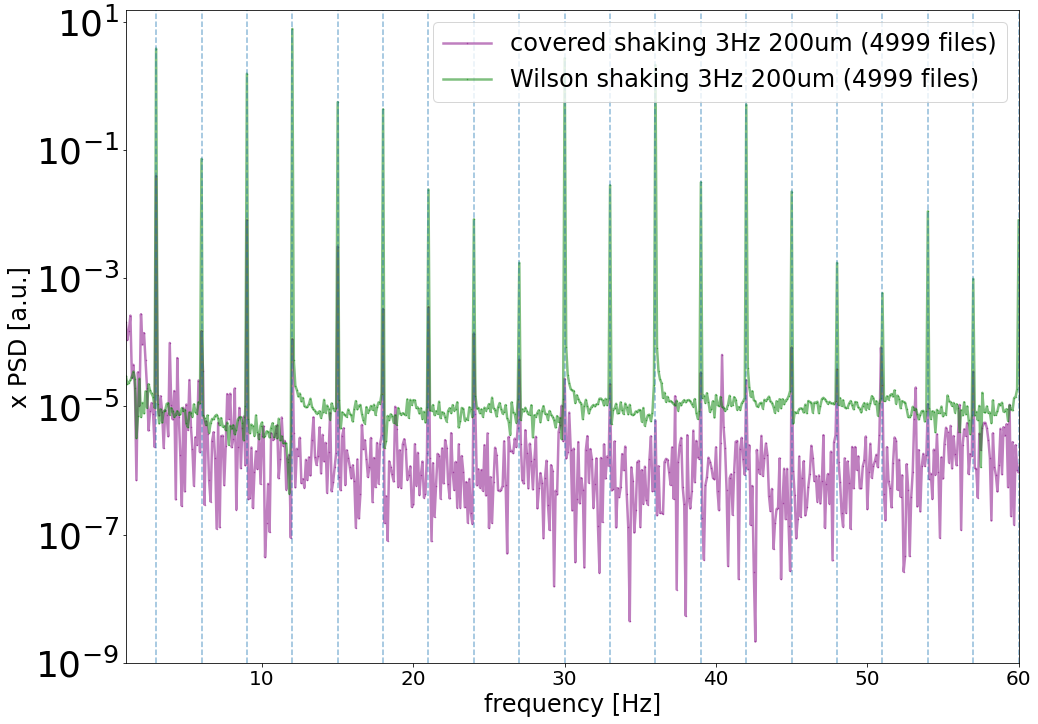

In [22]:
#plt.plot(f,xb, '.-', label="no shaking (989 files)",markersize=1,linewidth=2.5,color="orange")
#plt.plot(f,xb2, '.-', label="bug removed (1000 files)",markersize=1,linewidth=2.5,color="orange")

plt.plot(f,xs, '.-', label="covered shaking 3Hz 200um (4999 files)",markersize=1,linewidth=2.5,color="purple",alpha=0.5)#
plt.plot(f,xs2, '.-', label="Wilson shaking 3Hz 200um (4999 files)",markersize=1,linewidth=2.5,color="green",alpha=0.5)#
#plt.plot(f,xs3, '.-', label="shaking 3Hz 50um (499 files)",markersize=1,linewidth=2.5,color="red",alpha=0.5)#


for i in np.arange(3,150,3):
    plt.axvline(i,linestyle="dashed",alpha=0.5)
#for i in np.arange(13,260,13):
#    plt.axvline(i,linestyle="dashed",alpha=0.5)
#plt.axvline(51,linestyle="dashed",alpha=0.5,color="blue",label="harmonics of 3 hz")
plt.ylim(1e-9,15)
plt.xlim(1,60)
plt.yscale("log")
#plt.xscale("log")
plt.legend()
plt.ylabel("x PSD [a.u.]")
plt.xlabel("frequency [Hz]")
#plt.axhline(5.45095321073018e-06)
plt.show()

In [144]:
harms200 = []
harms100 = []
harms50 = []
harms0 = []

for harm in np.arange(30,6000,30):
    harms200.append(xs[harm])
    harms100.append(xs2[harm])
    #harms50.append(xs3[harm])
    #harms0.append(xb[harm])


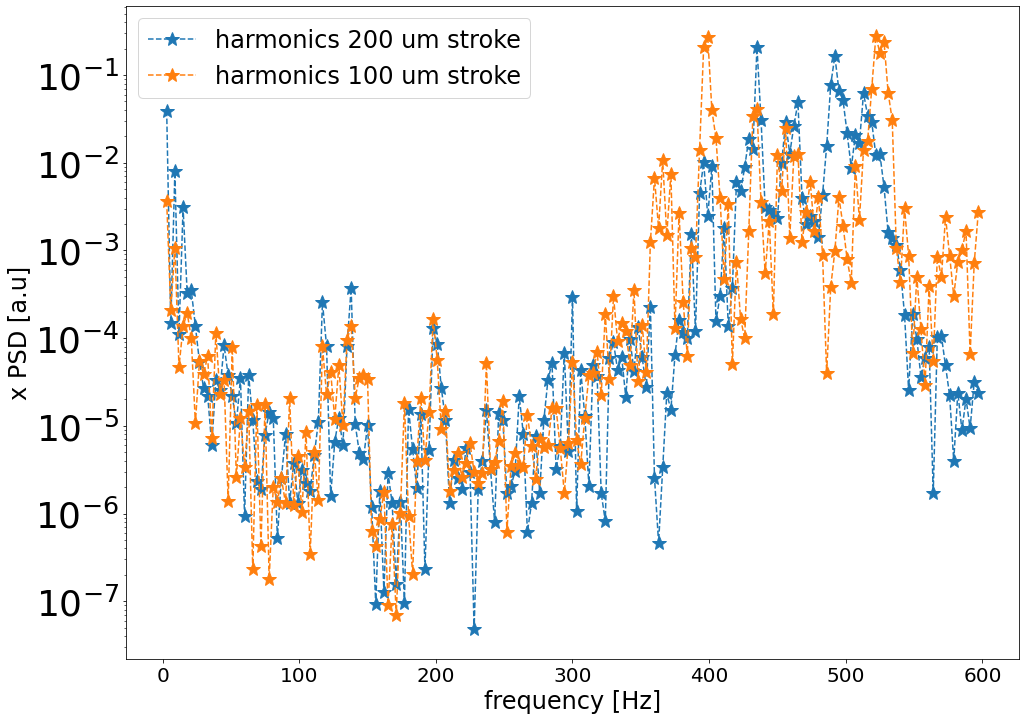

In [145]:
fHarm=np.arange(3,600,3)
plt.plot(fHarm,harms200,linestyle="--",marker="*",markersize=15,label="harmonics 200 um stroke")
plt.plot(fHarm,harms100,linestyle="--",marker="*",markersize=15,label="harmonics 100 um stroke")
#plt.plot(fHarm,harms50,linestyle="--",marker="*",markersize=15,label="harmonics 50 um stroke")
#plt.plot(fHarm,harms0,linestyle="--",marker="*",markersize=15,label="harmonics no shaking")

plt.legend()
plt.yscale("log")
plt.ylabel("x PSD [a.u]")
plt.xlabel("frequency [Hz]")
plt.show()
#plt.plot(ratio_200_50,linestyle="",marker="*",markersize=15)

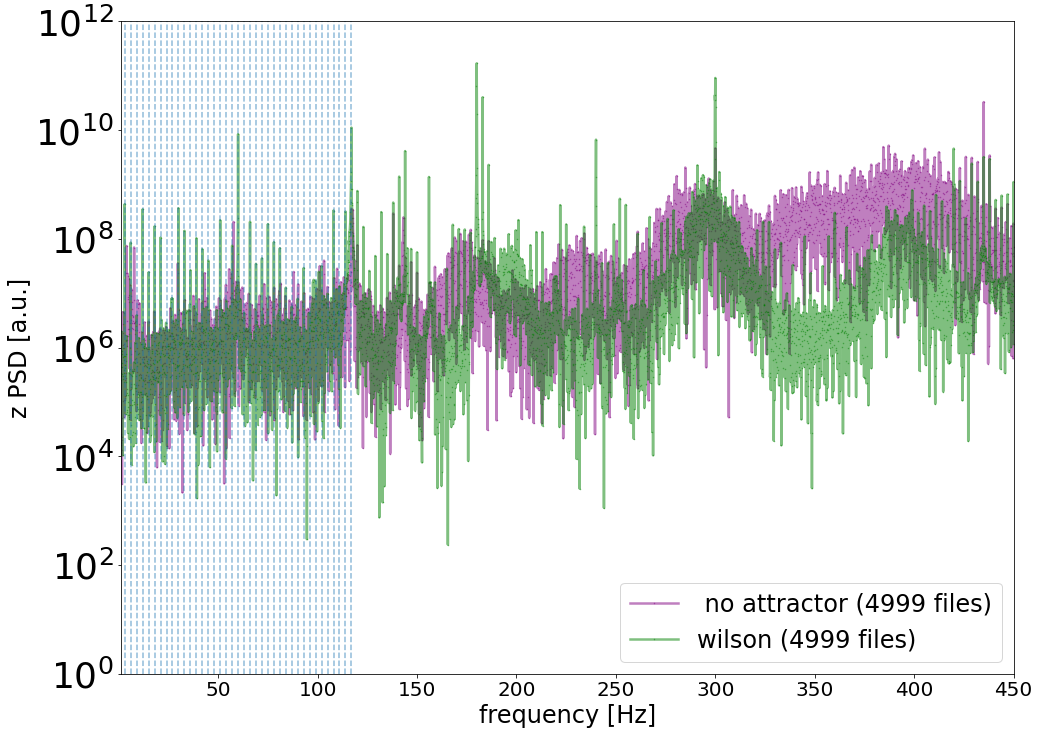

In [28]:
#plt.plot(f,zb, '.-', label="no shaking (989 files)",markersize=1,linewidth=2.5,color="orange")
#plt.plot(f,zb2, '.-', label="bug removed (1000 files)",markersize=1,linewidth=2.5,color="orange")

plt.plot(f,zs, '.-', label=" no attractor (4999 files)",markersize=1,linewidth=2.5,color="purple",alpha=0.5)#
plt.plot(f,zs2, '.-', label="wilson (4999 files)",markersize=1,linewidth=2.5,color="green",alpha=0.5)#
#plt.plot(f,zs3, '.-', label="shaking 3Hz 50 um ( 989 files)",markersize=1,linewidth=2.5,color="red",alpha=0.5)#


for i in np.arange(3,120,3):
    plt.axvline(i,linestyle="dashed",alpha=0.5)
#for i in np.arange(13,260,13):
#    plt.axvline(i,linestyle="dashed",alpha=0.5)
#plt.axvline(51,linestyle="dashed",alpha=0.5,color="blue",label="harmonics of 3 hz")
plt.ylim(1,1e12)
plt.xlim(1,450)
plt.yscale("log")
#plt.xscale("log")
plt.legend()
plt.ylabel("z PSD [a.u.]")
plt.xlabel("frequency [Hz]")
plt.show()

In [104]:
fs

0

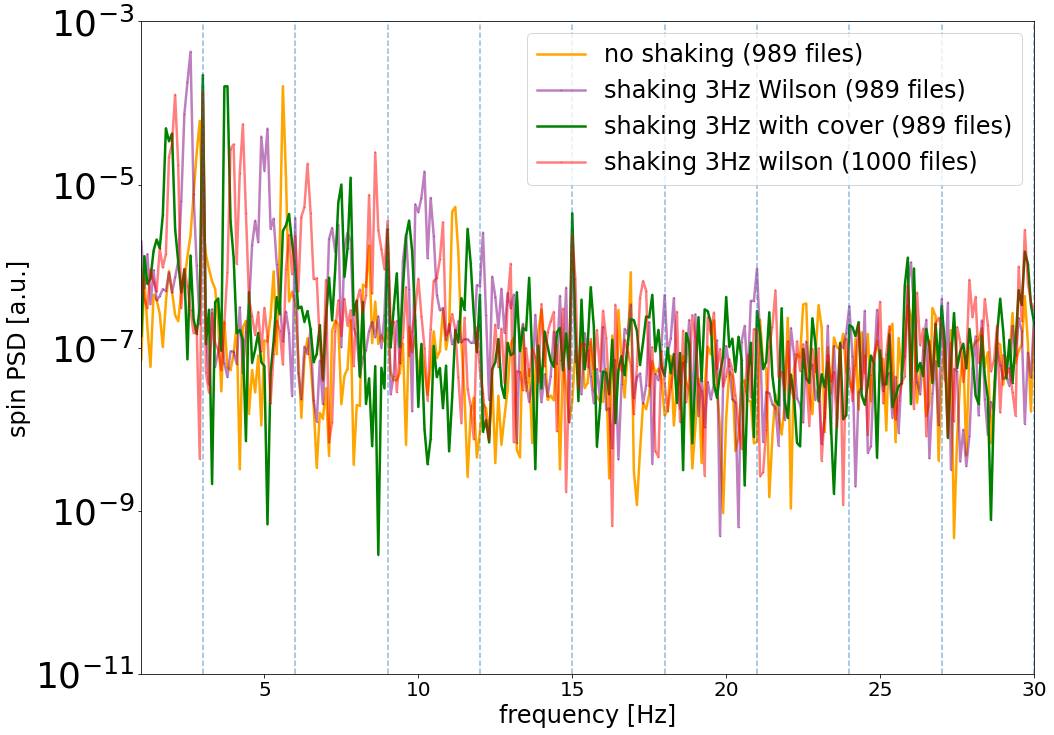

In [126]:
plt.plot(fs,sb, '.-', label="no shaking (989 files)",markersize=1,linewidth=2.5,color="orange")
#plt.plot(fs,sb2, '.-', label="bug removed (1000 files)",markersize=1,linewidth=2.5,color="orange")

plt.plot(fs,ss, '.-', label="shaking 3Hz Wilson (989 files)",markersize=1,linewidth=2.5,color="purple",alpha=0.5)#
plt.plot(fs,ss2, '.-', label="shaking 3Hz with cover (989 files)",markersize=1,linewidth=2.5,color="green",alpha=1)#
plt.plot(fs,ss3, '.-', label="shaking 3Hz wilson (1000 files)",markersize=1,linewidth=2.5,color="red",alpha=0.5)#


for i in np.arange(3,50,3):
    plt.axvline(i,linestyle="dashed",alpha=0.5)
#for i in np.arange(13,260,13):
#    plt.axvline(i,linestyle="dashed",alpha=0.5)
#plt.axvline(51,linestyle="dashed",alpha=0.5,color="blue",label="harmonics of 3 hz")
plt.ylim(1e-11,1e-3)
plt.xlim(1,30)
plt.yscale("log")
#plt.xscale("log")
plt.legend()
plt.ylabel("spin PSD [a.u.]")
plt.xlabel("frequency [Hz]")
plt.show()